In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Employment rate by ethnic group for the London boroughs and UK.

By Pamelpreet Jhinger.

This notebook will attempt to find any correlation between London hosting the 2012 Olympics and the employment rate of various ethnicities in London's boroughs, perhaps as a result of London looking more attractive to non-White working age citizens looking for employment.

The London 2012 Olympics was hosted in Barking and Dagenham, Greenwich, Hackney, Newham, Tower Hamlets and Waltham Forest so these boroughs are of particular interest during this analysis.

The data is taken from the [Annual Population Survey from the Office of National Statistics](https://data.london.gov.uk/dataset/employment-rates-by-ethnicity).

## Features.

* `year`: Year of observed ethnicities employed per borough.
* `area_code`: Area code corresponding to where employees of a particular ethnicity reside.
* `area`: Area corresponding to where employees of a particular ethnicity reside. Includes London's boroughs, major regions of England and countries of the UK.
* `ethnic_group`: Broad ethnic category in which employees fall under.
  * `White`: White British and/or European.
  * `Minority`: Total of all minority groups, including `Mixed`, `Indian`, `Pakistani/Bangladeshi`, `Black` and `Other` ethnicities. `Minority` is NOT mutually exclusive to the ethnic groups below, it is a union of them all.
  * `Mixed`: Mixed ethnic background.
  * `Indian`: Asian Indian.
  * `Pakistani/Bangladeshi`: Asian Pakistani or Asian Bangladeshi.
  * `Black`: Black or Black British.
  * `Other`: All other ethnic minorities aggregated into this category.
* `number`: Number of employees (of working age) falling under the `ethnic_group` specified working in `area`.
* `denominator`: Total working age population of falling under the `ethnic_group` specified working in `area`.
* `percent`: `number` / `denominator` i.e. the percentage of the working age population of `area` that are employed. 
* `confidence`: 95% confidence interval (+/-) of `percent`.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Global figsize.
figsize = (13, 8)

## Preparing the data.

In [3]:
url = "https://drive.google.com/file/d/1-3H2-yH8Xjjs7F0C2OZfHmMUPy7c0Uj8/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
employment_rate_ethnic_borough = pd.read_csv(path)
employment_rate_ethnic_borough.head()

year  area_code                  area  ... denominator percent confidence
0  2004  E09000001        City of London  ...       4,800    89.4        NaN
1  2004  E09000002  Barking and Dagenham  ...      76,900    61.7        7.5
2  2004  E09000003                Barnet  ...     142,500    74.1        6.9
3  2004  E09000004                Bexley  ...     122,200    76.0        6.3
4  2004  E09000005                 Brent  ...      88,300    70.6        8.1

[5 rows x 8 columns]

In [4]:
def data_summary(df):
  print(f"{color.BOLD + color.UNDERLINE}Column summary:{color.END}")
  print(df.info())
  print(f"{color.BOLD + color.UNDERLINE}Count of missing values per columns:{color.END}")
  print(df.isna().sum())
  display(df.head())

data_summary(employment_rate_ethnic_borough)

Column summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5712 entries, 0 to 5711
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5712 non-null   int64  
 1   area_code     5712 non-null   object 
 2   area          5712 non-null   object 
 3   ethnic_group  5712 non-null   object 
 4   number        5468 non-null   object 
 5   denominator   5567 non-null   object 
 6   percent       5470 non-null   float64
 7   confidence    4675 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 357.1+ KB
None
Count of missing values per columns:
year               0
area_code          0
area               0
ethnic_group       0
number           244
denominator      145
percent          242
confidence      1037
dtype: int64


year  area_code                  area  ... denominator percent confidence
0  2004  E09000001        City of London  ...       4,800    89.4        NaN
1  2004  E09000002  Barking and Dagenham  ...      76,900    61.7        7.5
2  2004  E09000003                Barnet  ...     142,500    74.1        6.9
3  2004  E09000004                Bexley  ...     122,200    76.0        6.3
4  2004  E09000005                 Brent  ...      88,300    70.6        8.1

[5 rows x 8 columns]

In [5]:
# Dropping all rows that have NaN's for both `number` and `denominator` columns.
df = employment_rate_ethnic_borough.copy()
df.dropna(subset=["number", "denominator"], how="all", inplace=True)
data_summary(df)

Column summary:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5567 entries, 0 to 5711
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5567 non-null   int64  
 1   area_code     5567 non-null   object 
 2   area          5567 non-null   object 
 3   ethnic_group  5567 non-null   object 
 4   number        5468 non-null   object 
 5   denominator   5567 non-null   object 
 6   percent       5470 non-null   float64
 7   confidence    4675 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 391.4+ KB
None
Count of missing values per columns:
year              0
area_code         0
area              0
ethnic_group      0
number           99
denominator       0
percent          97
confidence      892
dtype: int64


year  area_code                  area  ... denominator percent confidence
0  2004  E09000001        City of London  ...       4,800    89.4        NaN
1  2004  E09000002  Barking and Dagenham  ...      76,900    61.7        7.5
2  2004  E09000003                Barnet  ...     142,500    74.1        6.9
3  2004  E09000004                Bexley  ...     122,200    76.0        6.3
4  2004  E09000005                 Brent  ...      88,300    70.6        8.1

[5 rows x 8 columns]

In [6]:
# Remove all rows with NaN in `number` entry since I cannot use the global median because `number` depends on `denominator` and `year`.
df.dropna(subset=["number"], how="all", inplace=True)
data_summary(df)

Column summary:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5468 entries, 0 to 5711
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5468 non-null   int64  
 1   area_code     5468 non-null   object 
 2   area          5468 non-null   object 
 3   ethnic_group  5468 non-null   object 
 4   number        5468 non-null   object 
 5   denominator   5468 non-null   object 
 6   percent       5468 non-null   float64
 7   confidence    4675 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 384.5+ KB
None
Count of missing values per columns:
year              0
area_code         0
area              0
ethnic_group      0
number            0
denominator       0
percent           0
confidence      793
dtype: int64


year  area_code                  area  ... denominator percent confidence
0  2004  E09000001        City of London  ...       4,800    89.4        NaN
1  2004  E09000002  Barking and Dagenham  ...      76,900    61.7        7.5
2  2004  E09000003                Barnet  ...     142,500    74.1        6.9
3  2004  E09000004                Bexley  ...     122,200    76.0        6.3
4  2004  E09000005                 Brent  ...      88,300    70.6        8.1

[5 rows x 8 columns]

In [7]:
# After attempting to run this cell below this first, I realise I forgot to remove "#" values in 
# `number` and `denominator` columns.
# These were already present in the dataset provided, however there was no value description.
# I will just remove these rows as if they are NaNs.
df = df[df["number"] != "#"]
df = df[df["denominator"] != "#"]
data_summary(df)

Column summary:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5457 entries, 0 to 5711
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5457 non-null   int64  
 1   area_code     5457 non-null   object 
 2   area          5457 non-null   object 
 3   ethnic_group  5457 non-null   object 
 4   number        5457 non-null   object 
 5   denominator   5457 non-null   object 
 6   percent       5457 non-null   float64
 7   confidence    4675 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 383.7+ KB
None
Count of missing values per columns:
year              0
area_code         0
area              0
ethnic_group      0
number            0
denominator       0
percent           0
confidence      782
dtype: int64


year  area_code                  area  ... denominator percent confidence
0  2004  E09000001        City of London  ...       4,800    89.4        NaN
1  2004  E09000002  Barking and Dagenham  ...      76,900    61.7        7.5
2  2004  E09000003                Barnet  ...     142,500    74.1        6.9
3  2004  E09000004                Bexley  ...     122,200    76.0        6.3
4  2004  E09000005                 Brent  ...      88,300    70.6        8.1

[5 rows x 8 columns]

In [8]:
# Converting the `number` and `denominator` columns dtype to int64.
df["number"] = df["number"].str.replace('\,', '').astype(int)
df["denominator"] = df["denominator"].str.replace('\,', '').astype(int)
data_summary(df)

Column summary:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5457 entries, 0 to 5711
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5457 non-null   int64  
 1   area_code     5457 non-null   object 
 2   area          5457 non-null   object 
 3   ethnic_group  5457 non-null   object 
 4   number        5457 non-null   int64  
 5   denominator   5457 non-null   int64  
 6   percent       5457 non-null   float64
 7   confidence    4675 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 383.7+ KB
None
Count of missing values per columns:
year              0
area_code         0
area              0
ethnic_group      0
number            0
denominator       0
percent           0
confidence      782
dtype: int64


year  area_code                  area  ... denominator  percent  confidence
0  2004  E09000001        City of London  ...        4800     89.4         NaN
1  2004  E09000002  Barking and Dagenham  ...       76900     61.7         7.5
2  2004  E09000003                Barnet  ...      142500     74.1         6.9
3  2004  E09000004                Bexley  ...      122200     76.0         6.3
4  2004  E09000005                 Brent  ...       88300     70.6         8.1

[5 rows x 8 columns]

In [9]:
# Fill NaN `confidence` values as the smaller of the median and mean confidence interval.
df["confidence"].median(), df["confidence"].mean()

(11.0, 13.320855614973297)

In [10]:
# Fill NaN `confidence` values as the median confidence interval.
# TODO: CHANGE THIS TO ACTUALLY CALCULATE IT IF YOU CAN.
confidence_median = df["confidence"].median()
df.fillna({"confidence": confidence_median}, inplace=True)
data_summary(df)

Column summary:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5457 entries, 0 to 5711
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5457 non-null   int64  
 1   area_code     5457 non-null   object 
 2   area          5457 non-null   object 
 3   ethnic_group  5457 non-null   object 
 4   number        5457 non-null   int64  
 5   denominator   5457 non-null   int64  
 6   percent       5457 non-null   float64
 7   confidence    5457 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 383.7+ KB
None
Count of missing values per columns:
year            0
area_code       0
area            0
ethnic_group    0
number          0
denominator     0
percent         0
confidence      0
dtype: int64


year  area_code                  area  ... denominator  percent  confidence
0  2004  E09000001        City of London  ...        4800     89.4        11.0
1  2004  E09000002  Barking and Dagenham  ...       76900     61.7         7.5
2  2004  E09000003                Barnet  ...      142500     74.1         6.9
3  2004  E09000004                Bexley  ...      122200     76.0         6.3
4  2004  E09000005                 Brent  ...       88300     70.6         8.1

[5 rows x 8 columns]

## Exploratory Data Analysis.

In [11]:
# Major regions of the UK in the data here:

# Excludes olympic boroughs (which is defined below this)
london_boroughs = ["City of London",
                   "Barnet",
                   "Bexley",
                   "Brent",
                   "Bromley",
                   "Camden",
                   "Croydon",
                   "Ealing",
                   "Enfield",
                   "Hammersmith and Fulham",
                   "Haringey",
                   "Harrow",
                   "Havering",
                   "Hillingdon",
                   "Hounslow",
                   "Islington",
                   "Kensington and Chelsea",
                   "Kingston upon Thames",
                   "Lambeth",
                   "Lewisham",
                   "Merton",
                   "Redbridge",
                   "Richmond upon Thames",
                   "Southwark",
                   "Sutton",
                   "Wandsworth",
                   "Westminster"]

london = ["Inner London",
          "Outer London"]

uk_regions = ["North East",
              "North West",
              "Yorkshire and The Humber",
              "East Midlands",
              "West Midlands",
              "East",
              "London",
              "South East",
              "South West"]

uk_countries = ["Wales",
                "Scotland",
                "Northern Ireland",
                "England",
                "England and Wales",
                "Great Britain"
                "United Kingdom"]

# London boroughs that hosted the olympics.
olympic_boroughs = ["Barking and Dagenham",
                    "Greenwich",
                    "Hackney",
                    "Newham",
                    "Tower Hamlets",
                    "Waltham Forest"]

### Percentage of working age population employed by ethnic group yearly.

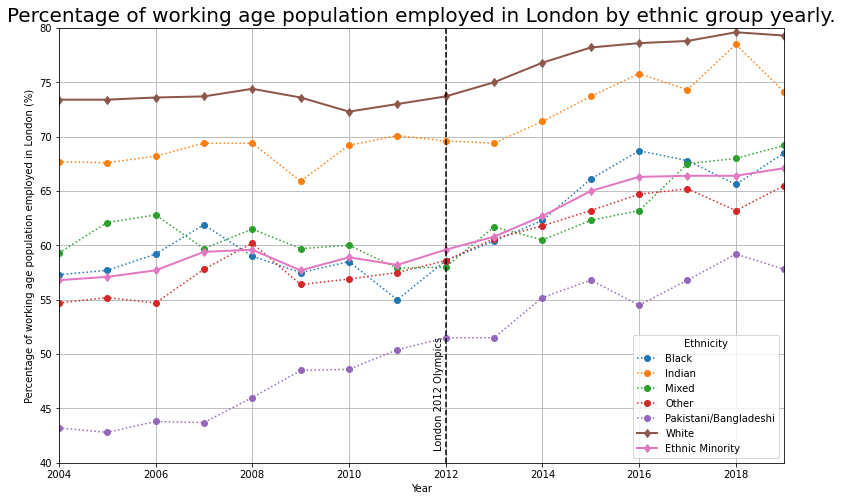

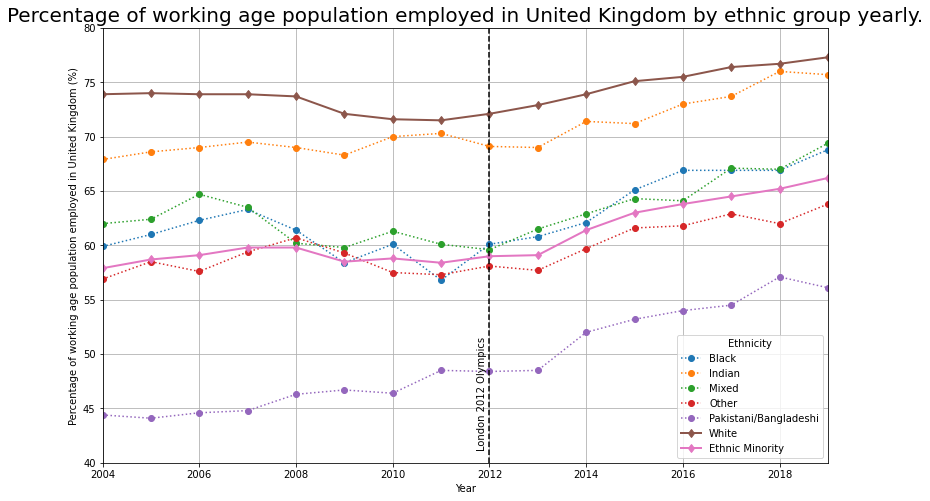

In [12]:
# TODO: Add linear interpolation for missing data? Might be a bad idea so I won't do it for now.
def plot_ethnic_percentages_in(area, **kwargs): #**kwargs
  """
  area: String
    Area in which we plot the percentage of ethnicities employed.
  
  standard_ylim: Bool
    If True, set the y-axis scale to show 0 to 100%, otherwise if False 
    (default) set y-axis scale to the range given by the maximum and minimum 
    percentages.
  """
  standard_ylim = kwargs.get('standard_ylim', False)

  str_area = ""
  if isinstance(area, str):
    place = df[df["area"] == area]
    str_area = area
  elif isinstance(area, pd.DataFrame):
    place = area
    str_area = area["area"][0]
  else:
    print("No area provided. Provide a string or pandas DataFrame.")
    return
  
  # Get the borough's employment ethnic percentage data.
  place = place[["year", "ethnic_group", "percent"]]

  # Getting the limits for customising y-axis limits on graph.
  ymin = place["percent"].min()
  ymax = ymax = place["percent"].max()
  ymin = 0 if ymin <= 5 else ymin - (ymin % 5)
  ymax = 100 if ymax >= 95 else ymax + (5 - ymax % 5)

  # Separating the White and Minority ethnic groups from th area's data since 
  # these are the major groups to compare - Can change how I plot these two results.
  white = place[place["ethnic_group"] == "White"]
  place = place[place["ethnic_group"] != "White"]
  minority = place[place["ethnic_group"] == "Minority"]
  place = place[place["ethnic_group"] != "Minority"]

  # Plot each ethnicity's percentage over the years on single line graph.
  place = place.pivot(index="year", columns="ethnic_group", values="percent")
  if place.empty:
    return
  
  place.plot(figsize=figsize, marker='o', linestyle='dotted')
  plt.plot(white["year"], white["percent"], marker="d", linewidth=2, label="White")
  plt.plot(minority["year"], minority["percent"], marker="d", linewidth=2, label="Ethnic Minority")
  plt.legend(title="Ethnicity")

  # Graph customisation.
  plt.grid(which="both", axis="both")
  plt.title(f"Percentage of working age population employed in {str_area} by ethnic group yearly.",
            fontdict={'fontsize': 20})
  plt.xlim(2004, 2019)
  plt.xlabel("Year")
  if not standard_ylim:
    plt.ylim(ymin, ymax)
  else:
    plt.ylim(0, 100)
  plt.ylabel(f"Percentage of working age population employed in {str_area} (%)")
  
  # Highlighting London 2012 Olympics year.
  plt.axvline(2012, c="black", linestyle="--")
  bottom, top = plt.ylim()
  height = 0.03125 * (top - bottom) + bottom
  plt.text(2011.75, height, "London 2012 Olympics", rotation=90)

  plt.savefig(f"/content/drive/My Drive/Citadel Securities Correlation One Summer Data Open 2020/figures/percentages-{str_area}")

  plt.show()

plot_ethnic_percentages_in("London")
plot_ethnic_percentages_in("United Kingdom")

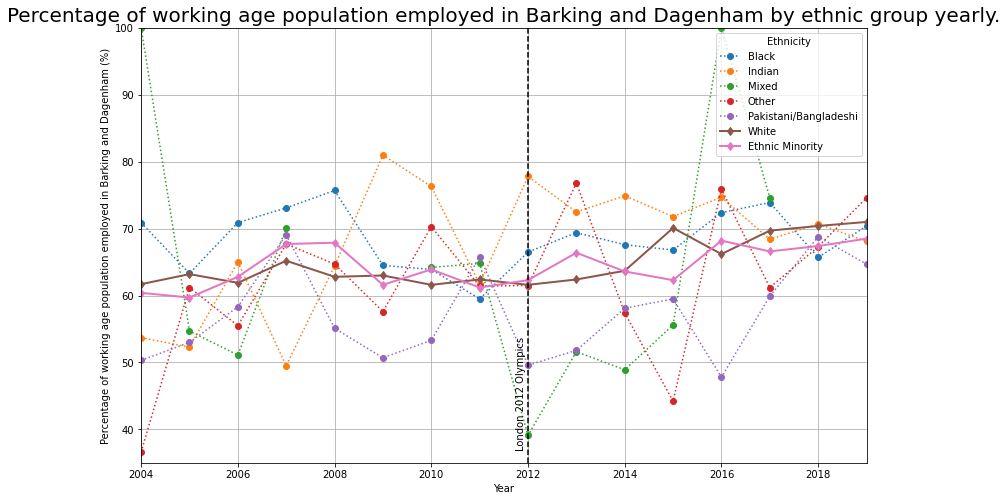

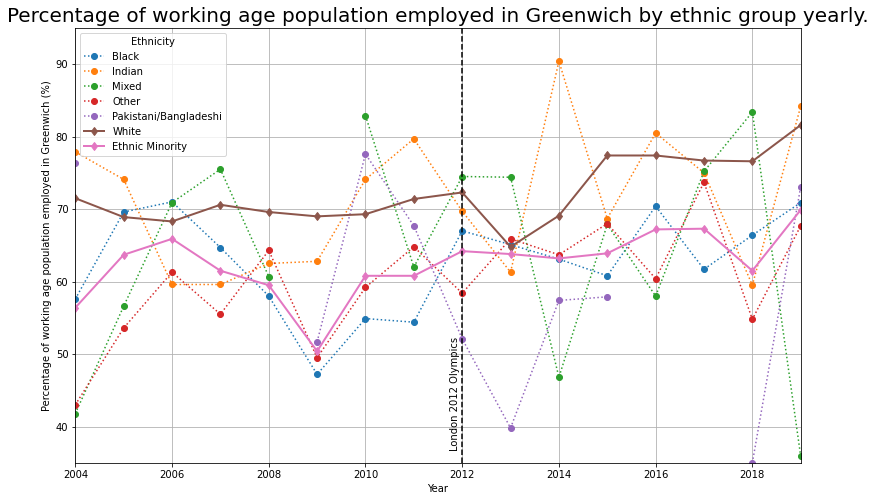

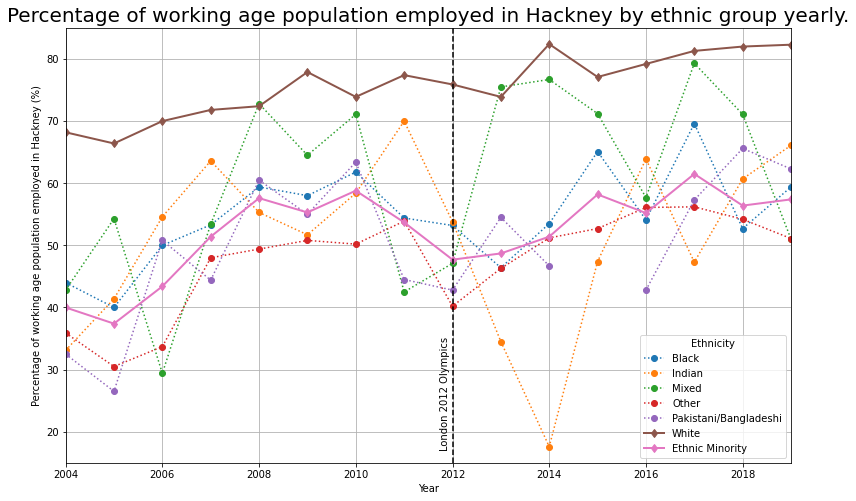

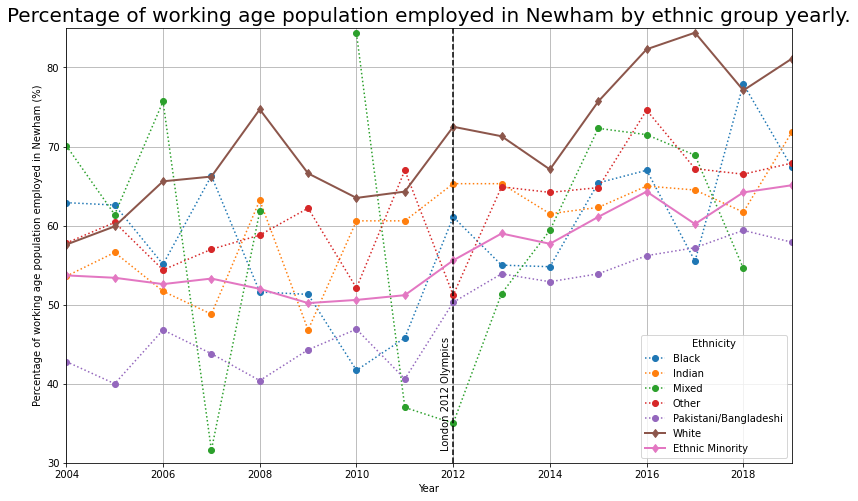

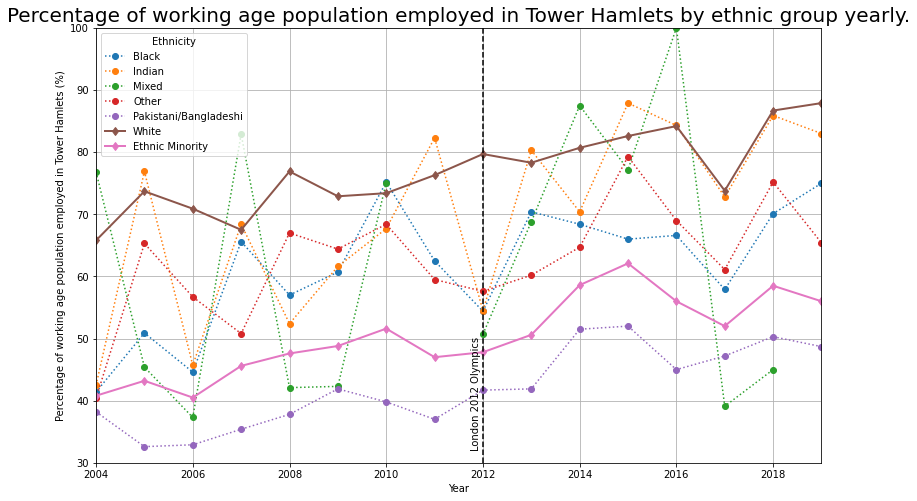

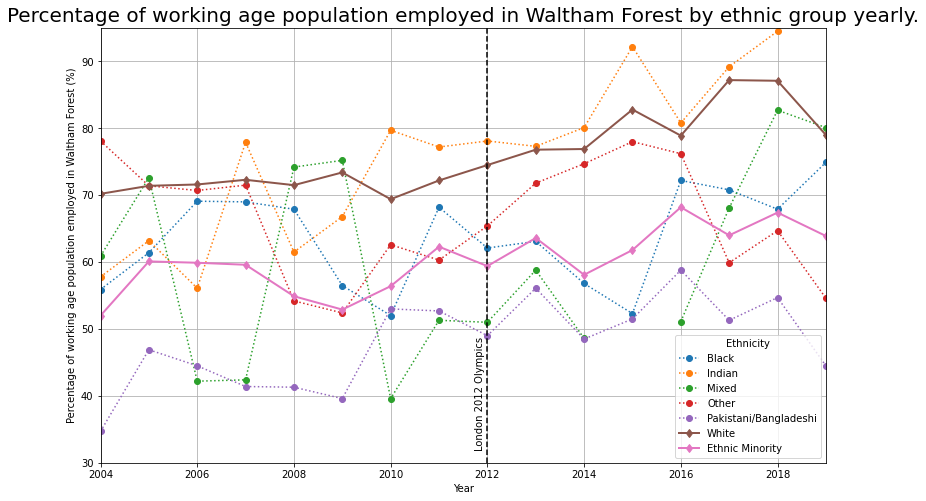

In [13]:
for area in olympic_boroughs:
  plot_ethnic_percentages_in(area)

In [14]:
for area in london_boroughs:
  plot_ethnic_percentages_in(area)

Output hidden; open in https://colab.research.google.com to view.

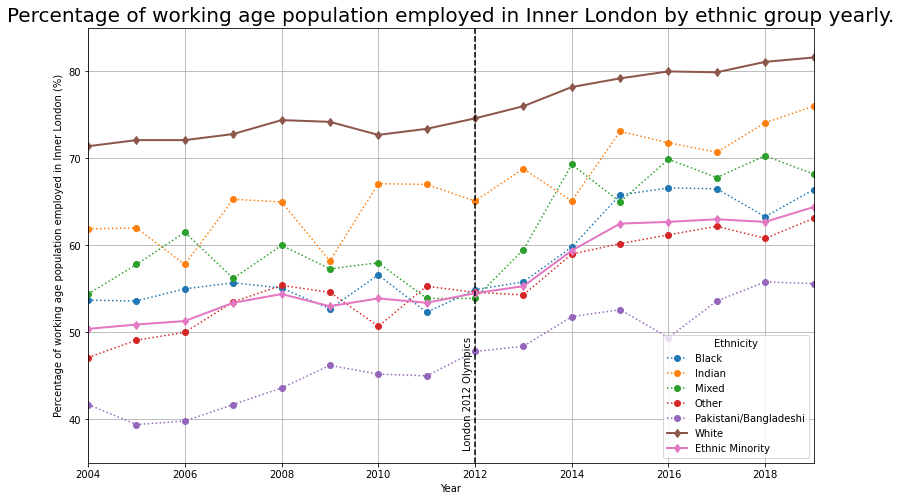

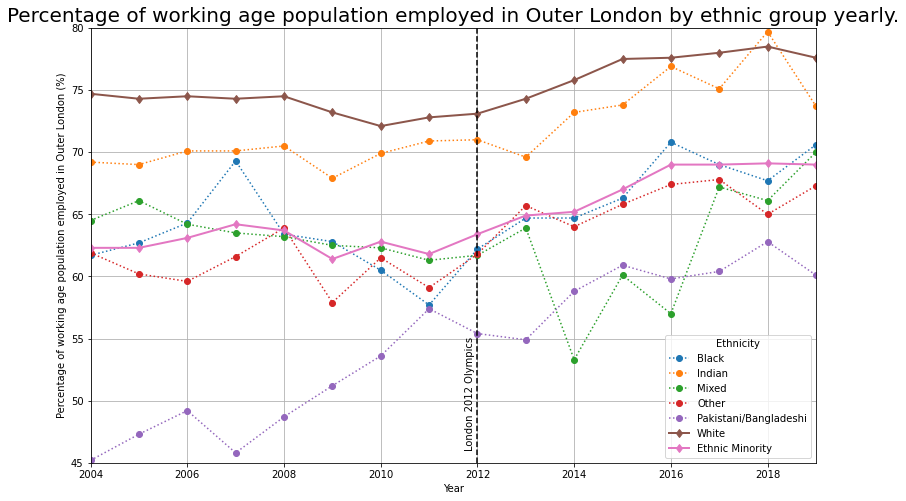

In [15]:
for area in london:
  plot_ethnic_percentages_in(area)

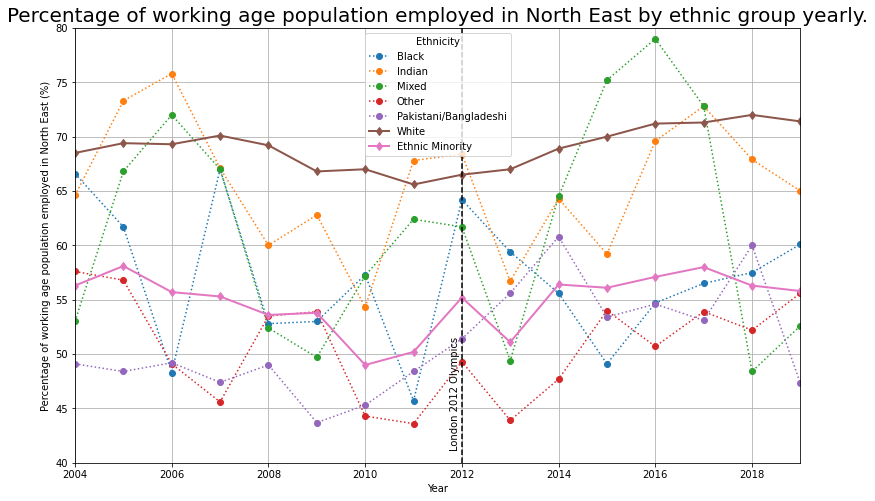

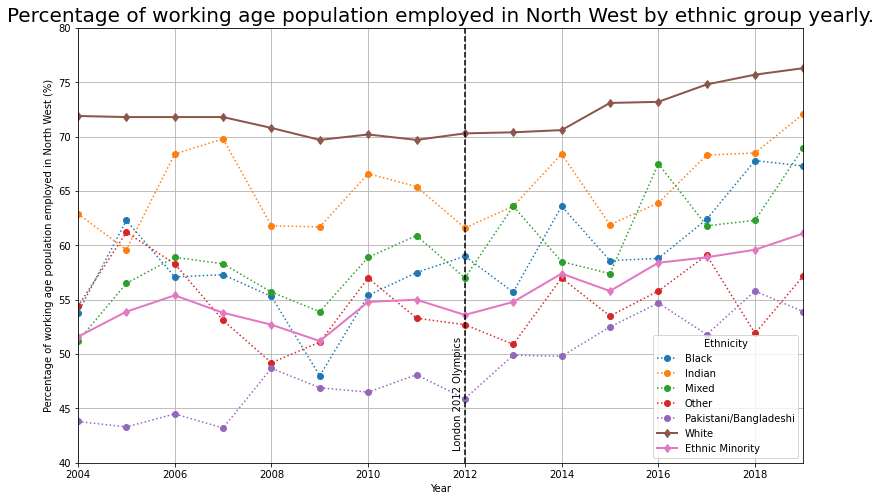

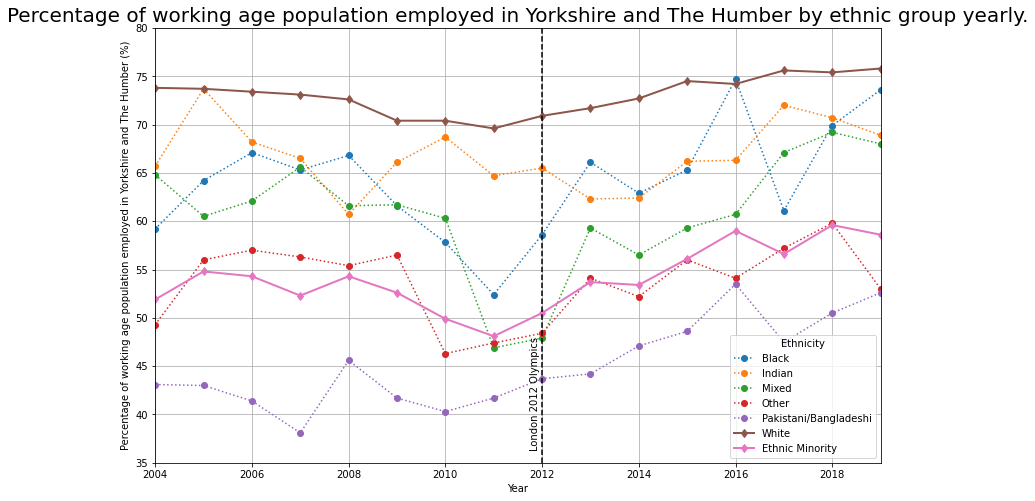

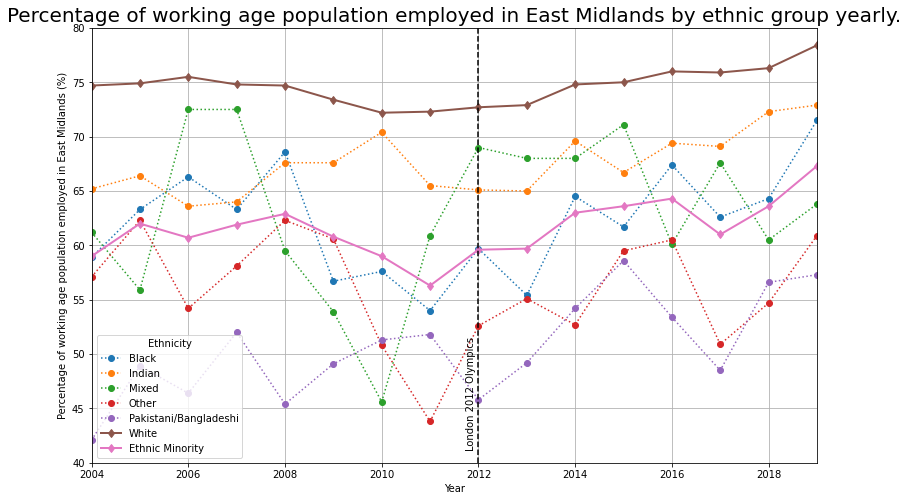

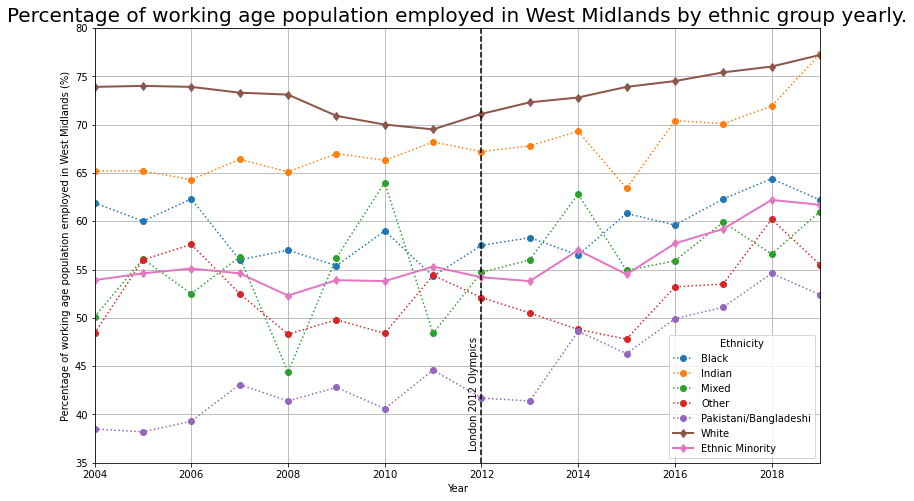

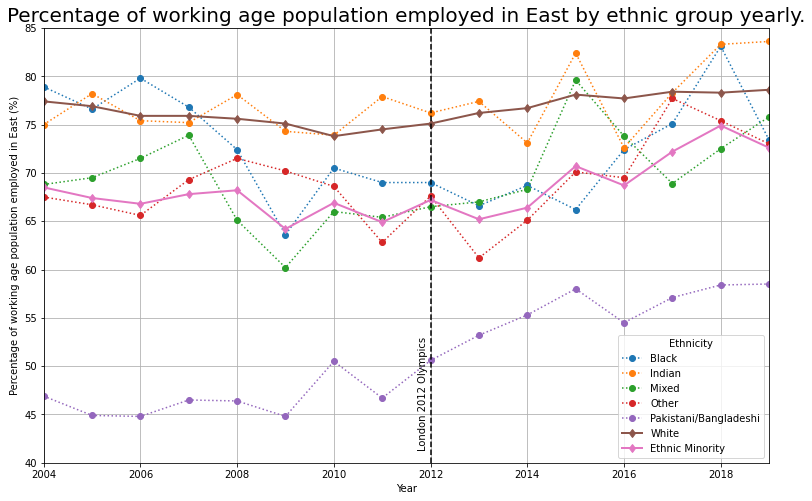

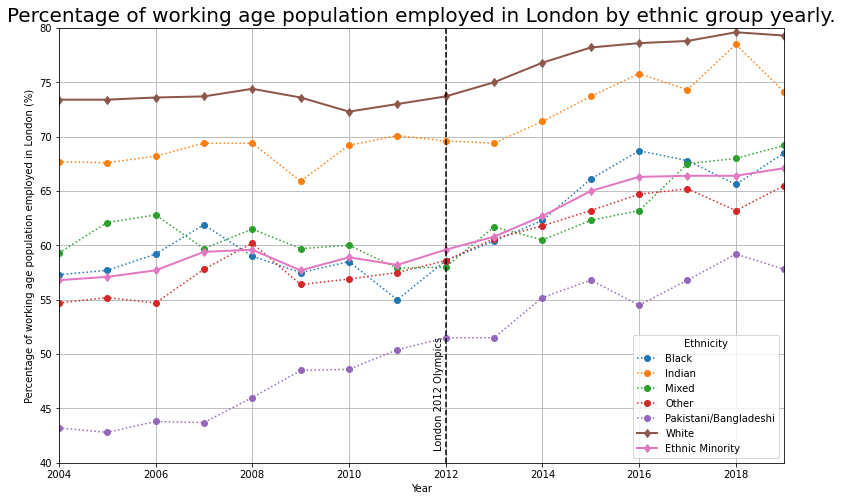

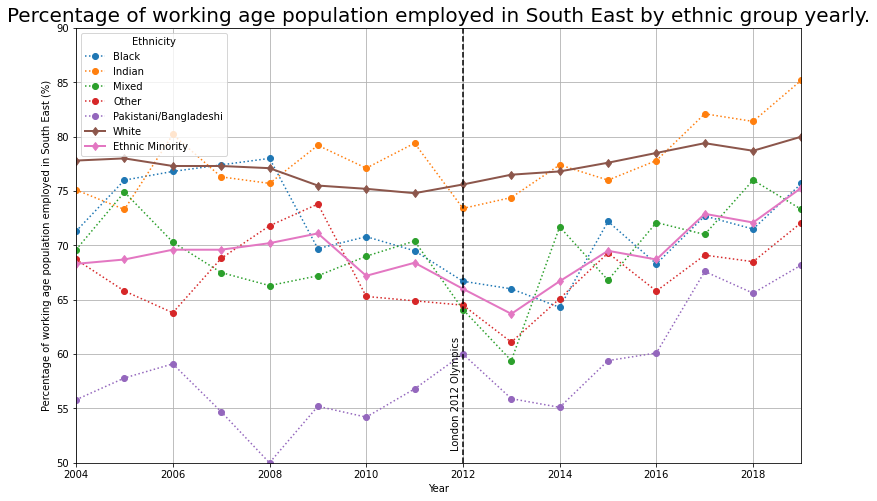

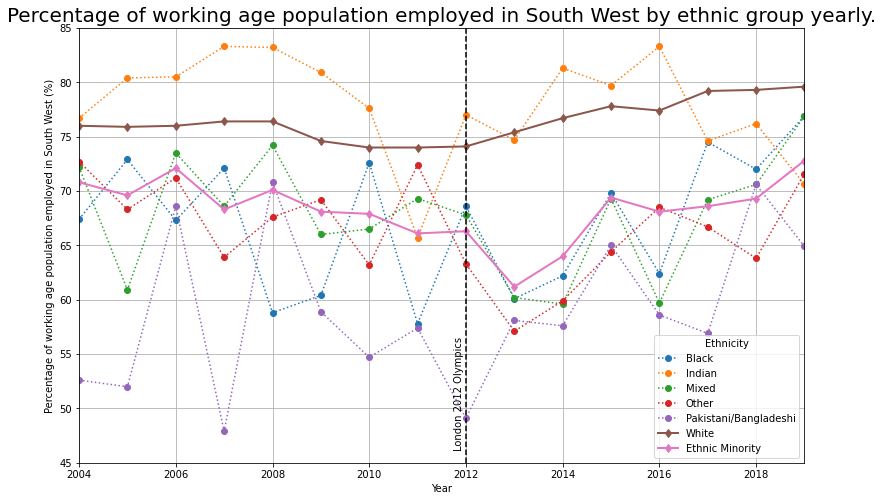

In [16]:
for area in uk_regions:
  plot_ethnic_percentages_in(area)

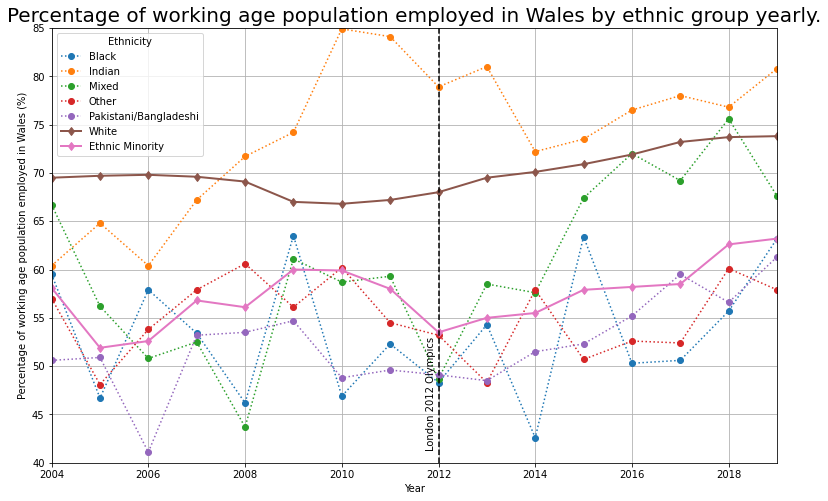

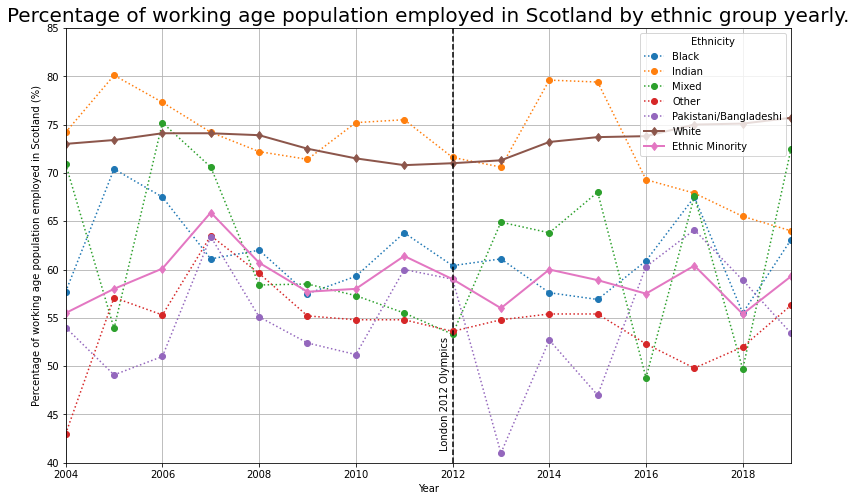

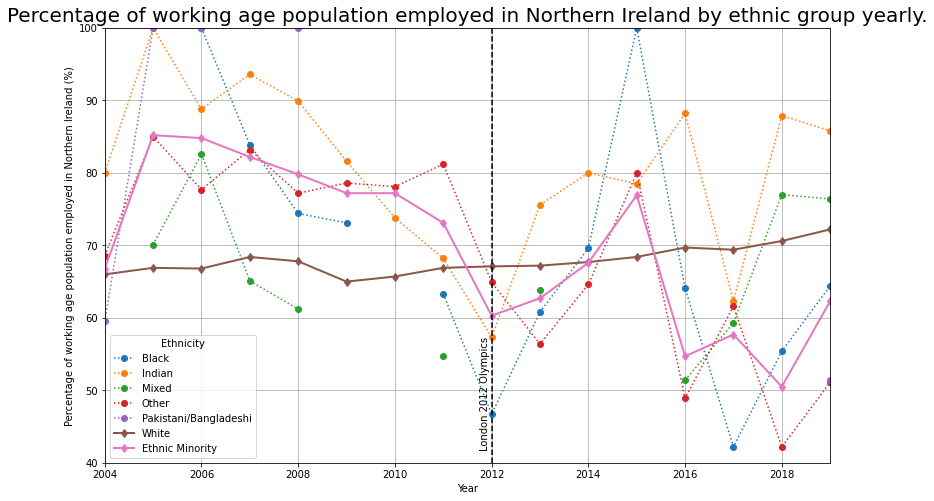

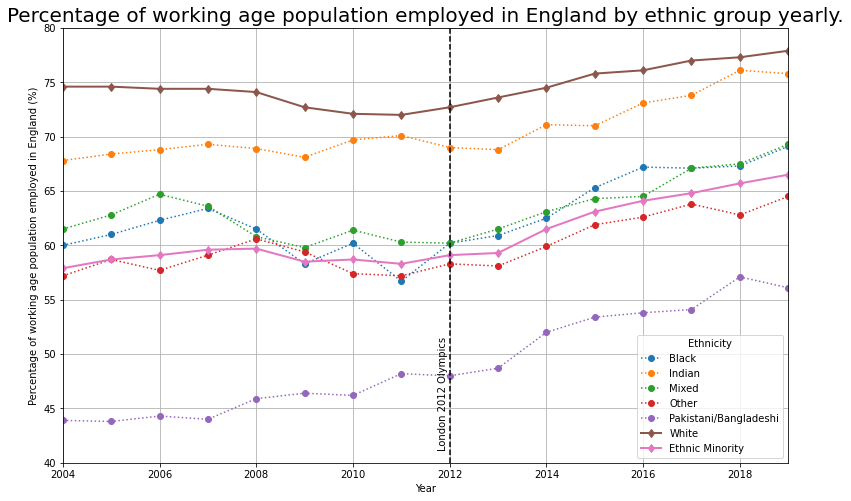

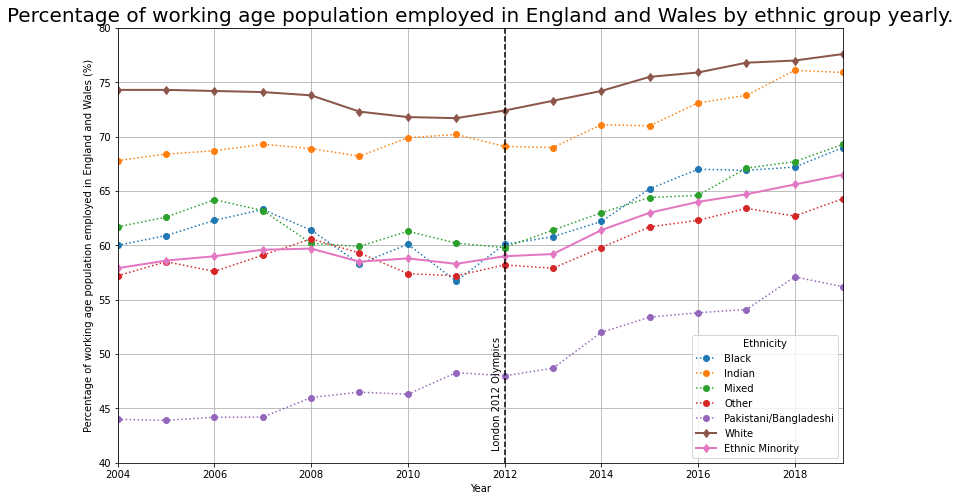

In [17]:
for area in uk_countries:
  plot_ethnic_percentages_in(area)

### Working age population employed by ethnic group yearly.

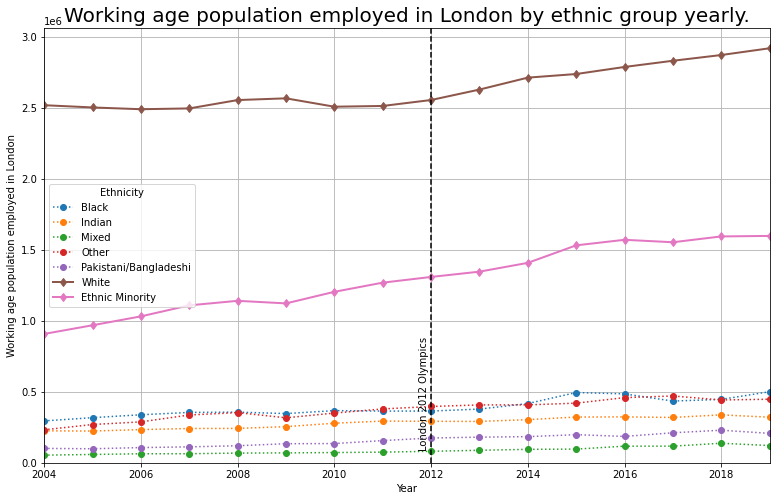

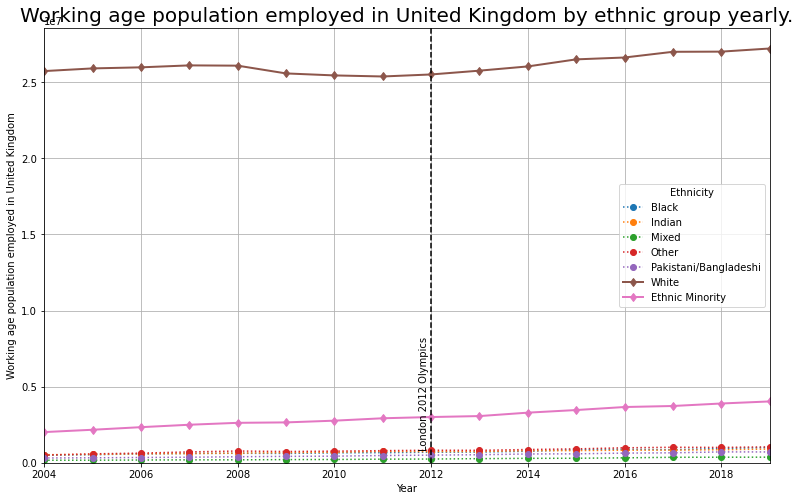

In [18]:
# Maybe I should try to model the actual population for each?
def plot_ethnic_population_in(area, **kwargs): #**kwargs
  """
  area: String
    Area in which we plot the population of ethnicities employed.
  """
  str_area = ""
  if isinstance(area, str):
    place = df[df["area"] == area]
    str_area = area
  elif isinstance(area, pd.DataFrame):
    place = area
    str_area = area["area"][0]
  else:
    print("No area provided. Provide a string or pandas DataFrame.")
    return
  
  # Get the borough's employment ethnic population data.
  place = place[["year", "ethnic_group", "number"]]

  # Getting height for text position indicating vertical 2012 line.
  min_height = place["number"].min()

  white = place[place["ethnic_group"] == "White"]
  place = place[place["ethnic_group"] != "White"]
  minority = place[place["ethnic_group"] == "Minority"]
  place = place[place["ethnic_group"] != "Minority"]

  # Plot each ethnicity's population over the years on single line graph.
  if place.empty:
    return
  place = place.pivot_table(index="year",
                            columns="ethnic_group",
                            values="number")
  place.plot(figsize=figsize, marker='o', linestyle='dotted')
  plt.plot(white["year"], white["number"], marker="d", linewidth=2, label="White")
  plt.plot(minority["year"], minority["number"], marker="d", linewidth=2, label="Ethnic Minority")

  # Graph customisation.
  plt.legend(title="Ethnicity")
  # plt.ticklabel_format(style="plain")
  plt.grid(which="both", axis="both")
  plt.title(f"Working age population employed in {str_area} by ethnic group yearly.",
            fontdict={'fontsize': 20})
  plt.xlim(2004, 2019)
  plt.xlabel("Year")
  plt.ylim(bottom=0)
  plt.ylabel(f"Working age population employed in {str_area}")
  
  # Highlighting London 2012 Olympics year.
  plt.axvline(2012, c="black", linestyle="--")
  bottom, top = plt.ylim()
  height = 0.03125 * (top - bottom)
  plt.text(2011.75, height, "London 2012 Olympics", rotation=90)

  plt.savefig(f"/content/drive/My Drive/Citadel Securities Correlation One Summer Data Open 2020/figures/population-{str_area}")
  
  plt.show()


plot_ethnic_population_in(area="London")
plot_ethnic_population_in(area="United Kingdom")

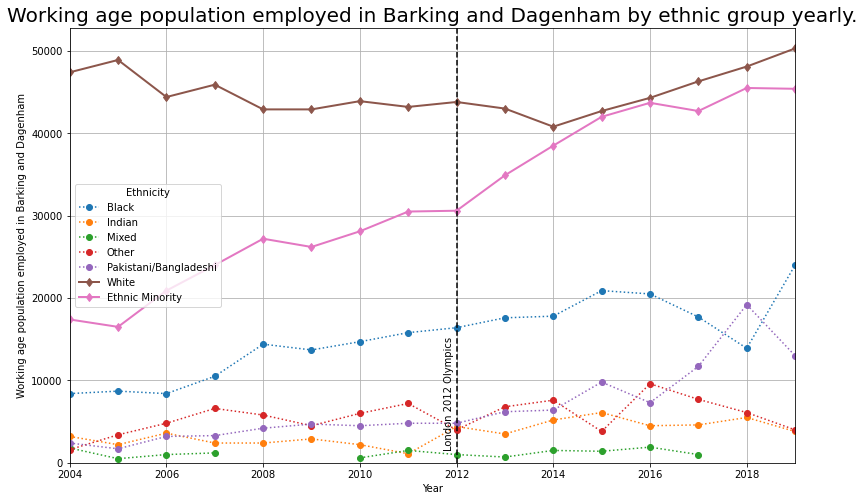

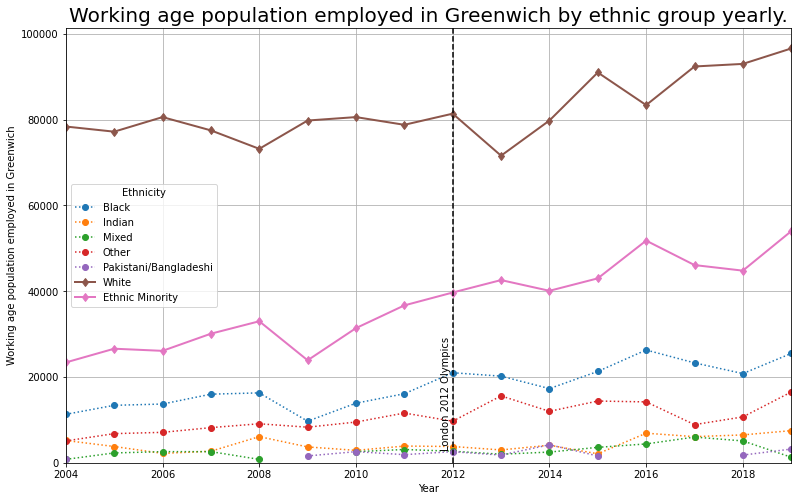

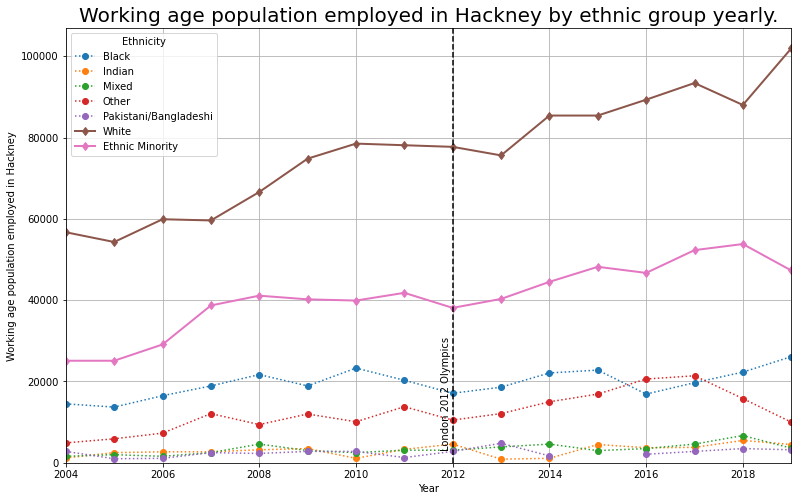

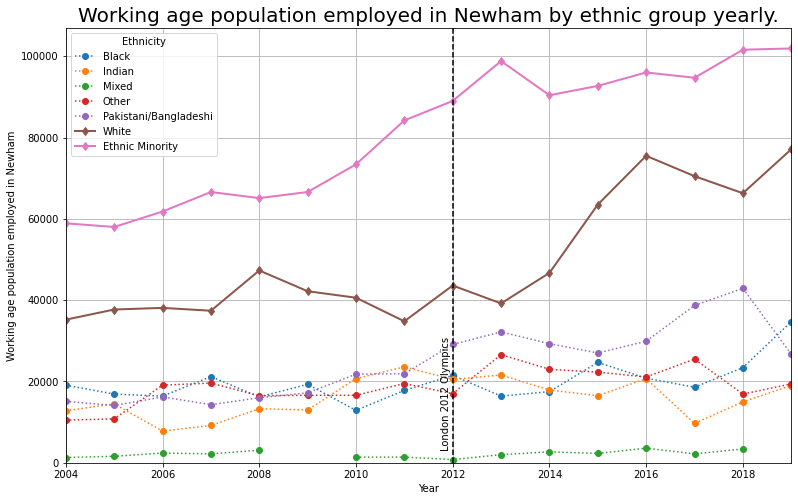

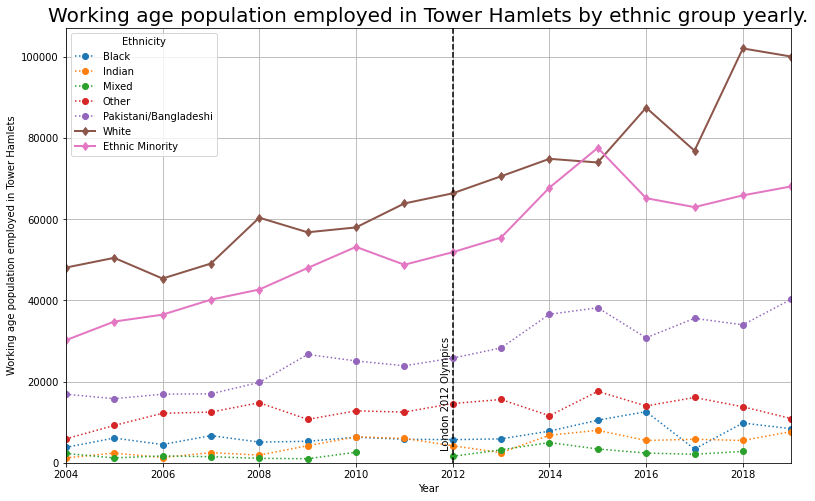

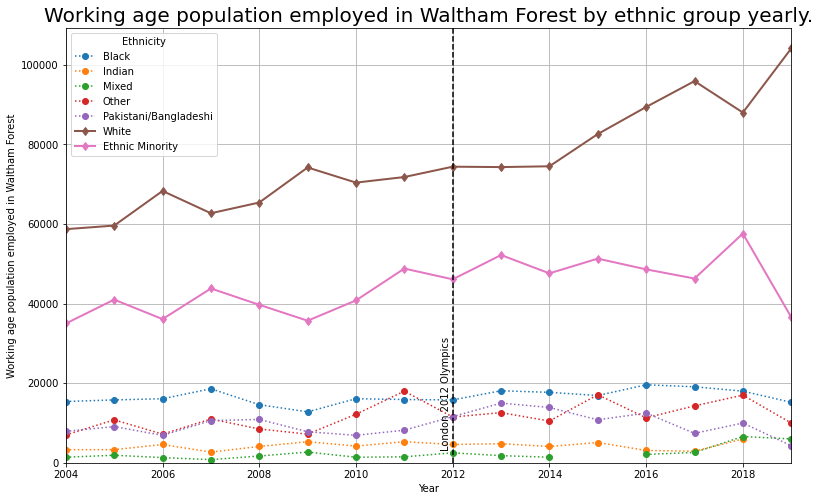

In [19]:
for area in olympic_boroughs:
  plot_ethnic_population_in(area)

In [20]:
for area in london_boroughs:
  plot_ethnic_population_in(area)

Output hidden; open in https://colab.research.google.com to view.

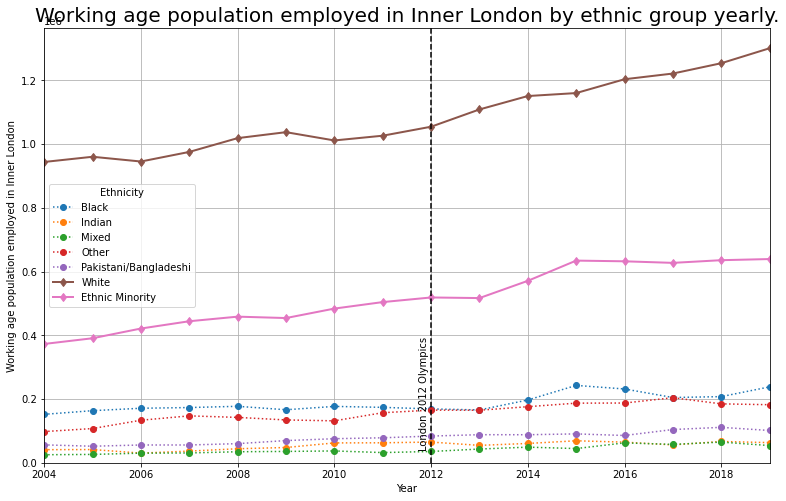

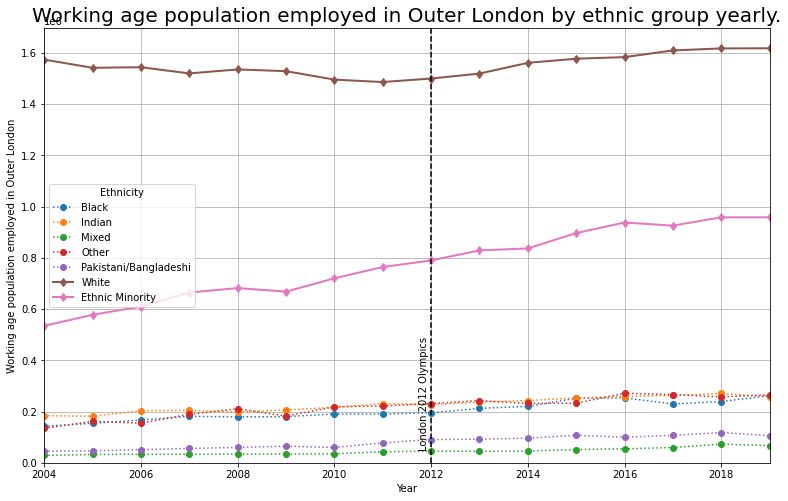

In [21]:
for area in london:
  plot_ethnic_population_in(area)

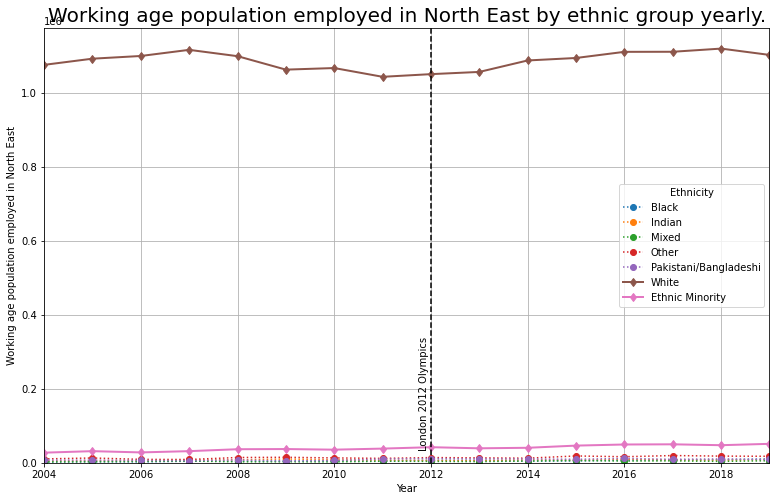

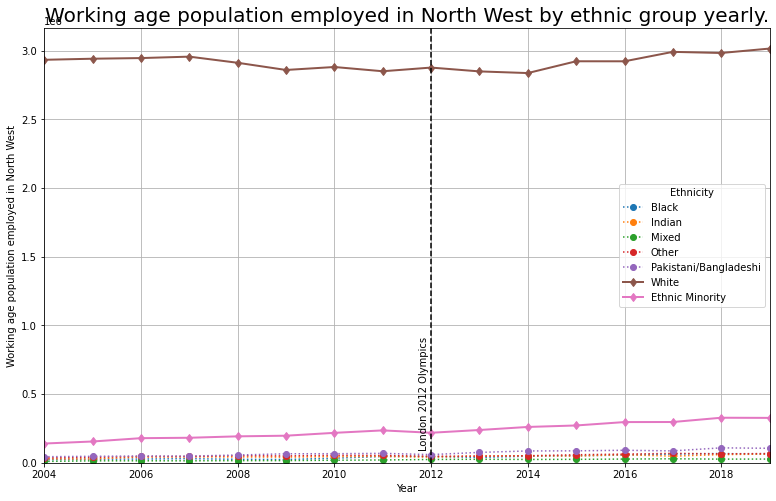

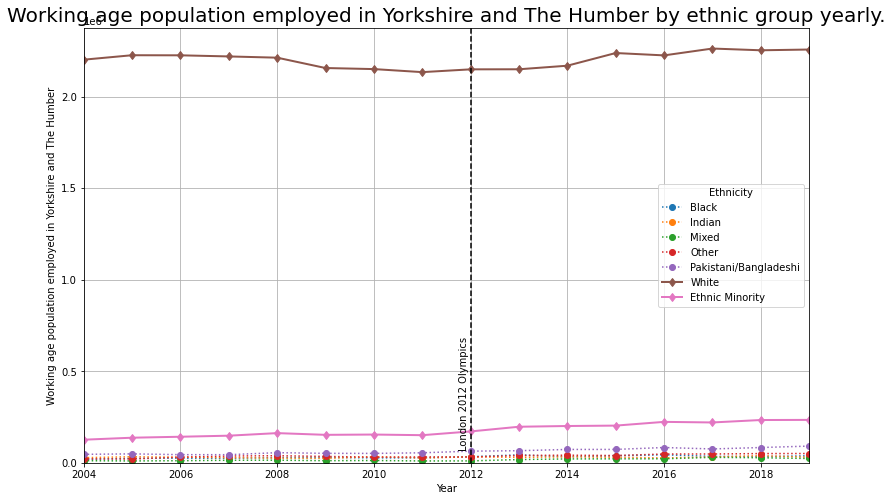

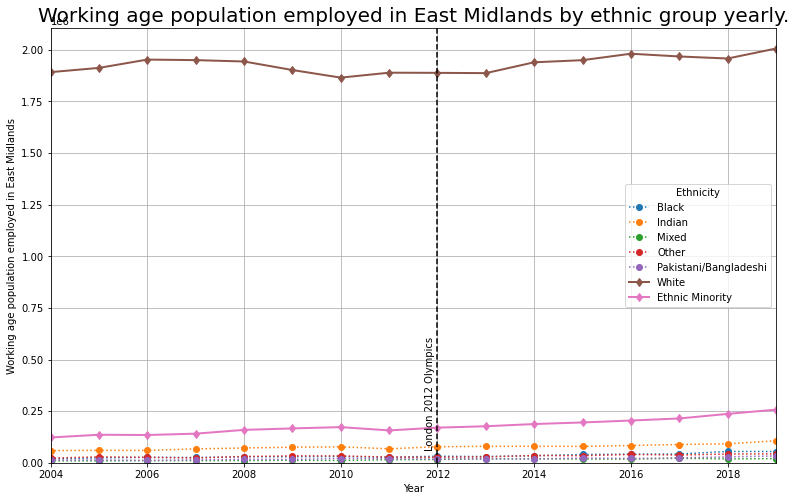

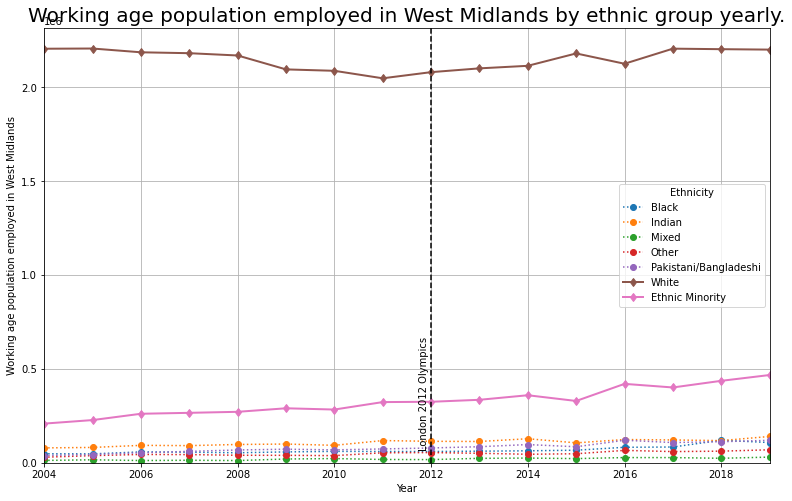

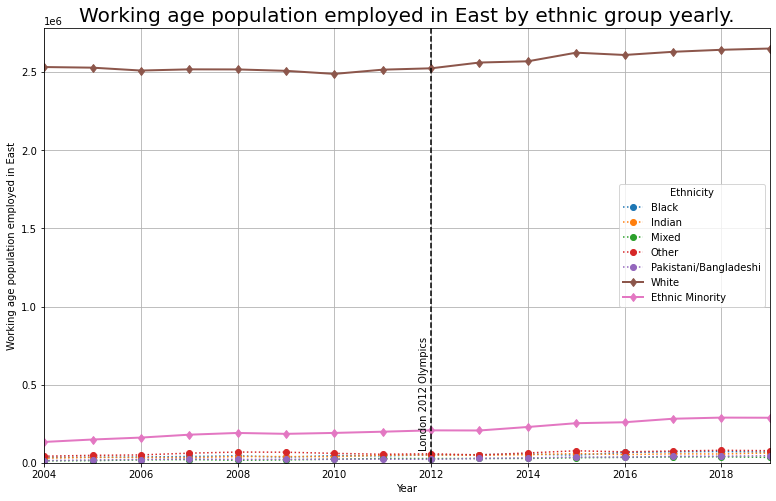

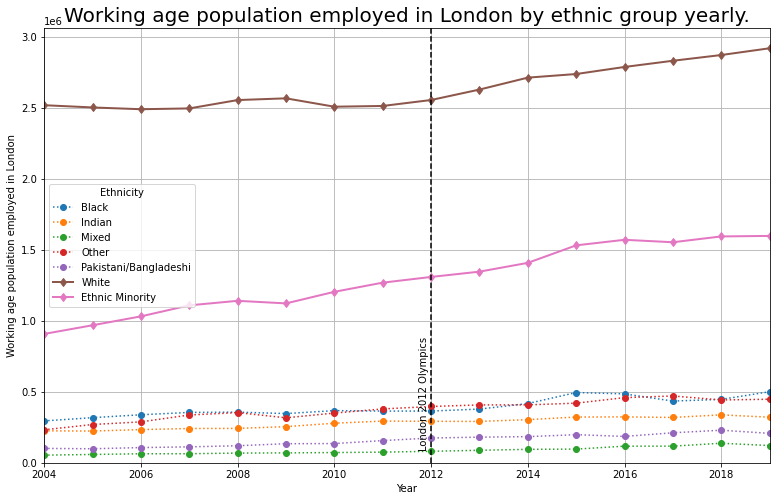

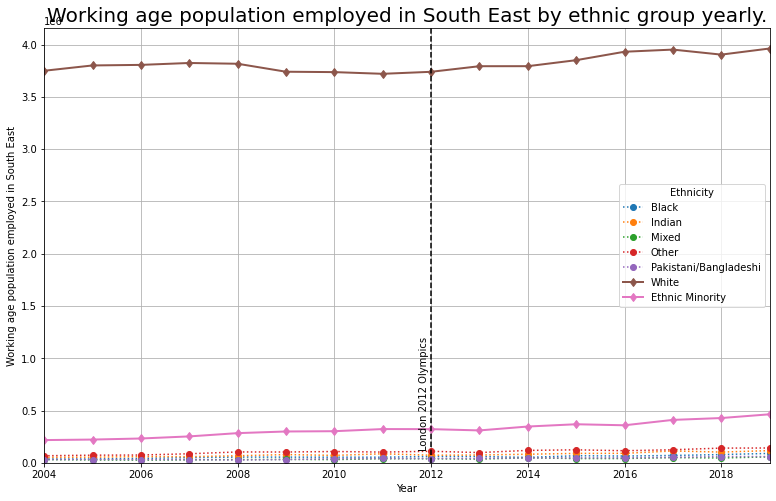

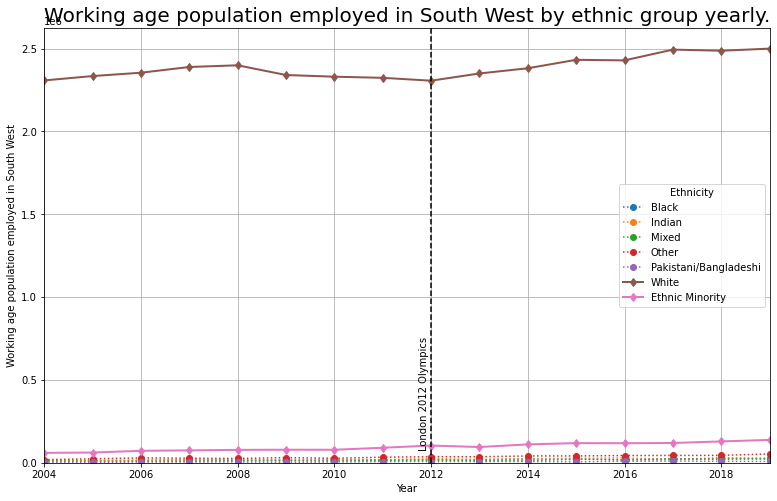

In [22]:
for area in uk_regions:
  plot_ethnic_population_in(area)

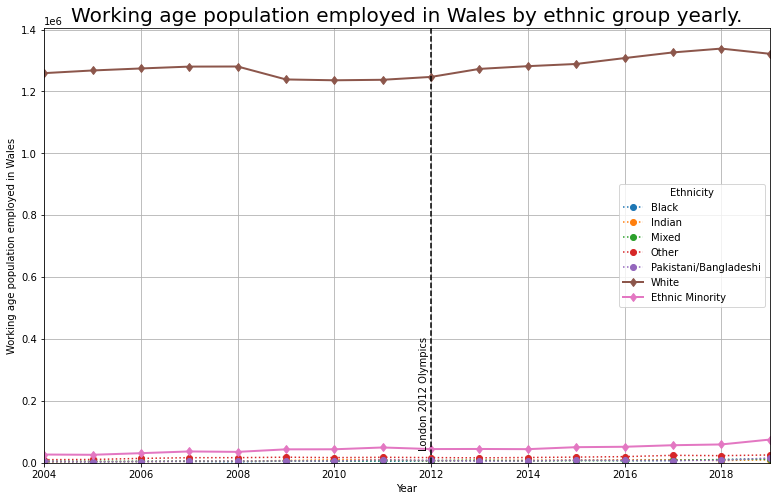

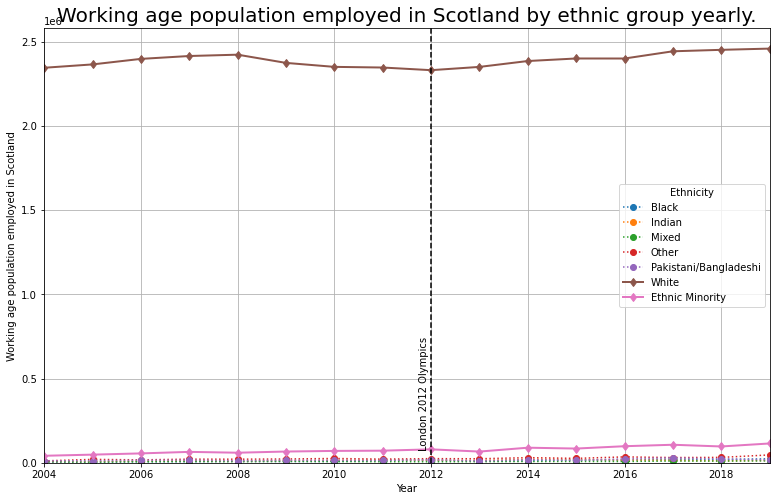

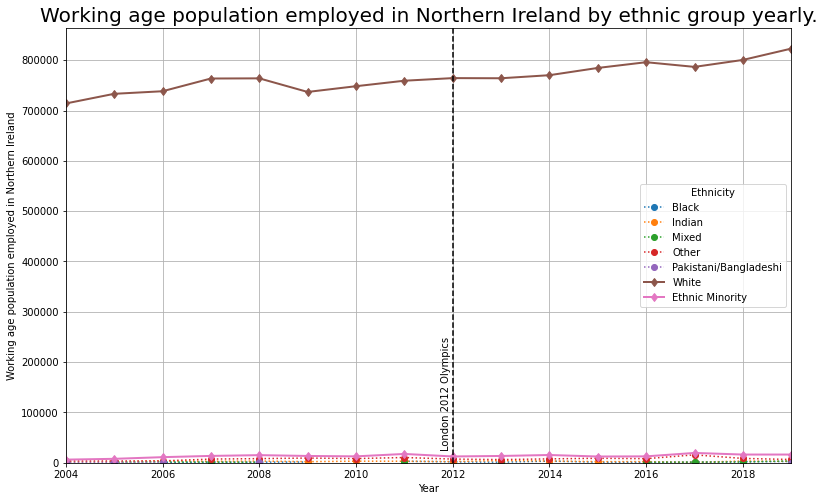

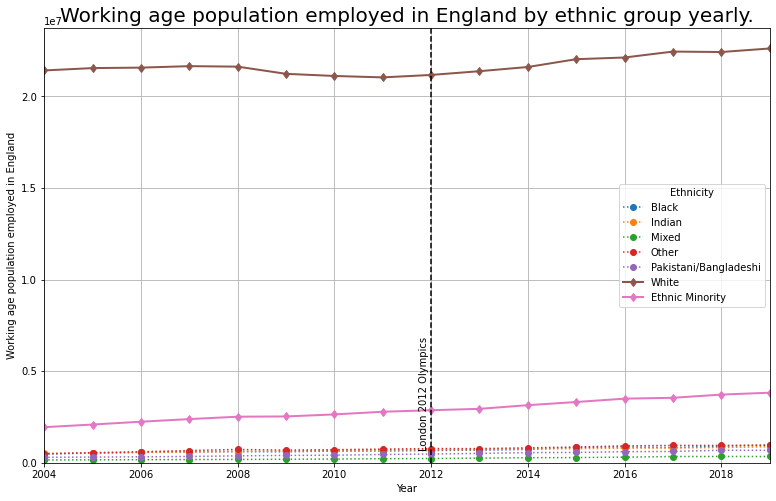

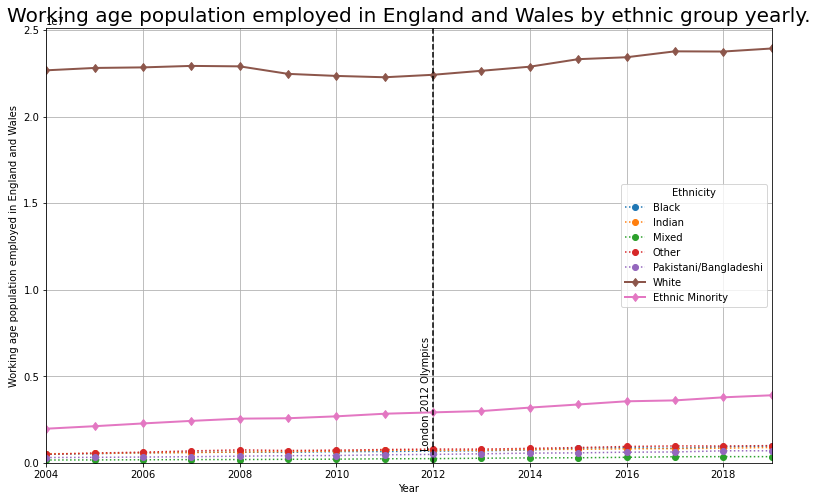

In [23]:
for area in uk_countries:
  plot_ethnic_population_in(area)

### Comparison of employment rate by ethnicity in London and the UK excluding London.

Perhaps I should separate London and the UK without London into two mutually exclusive data sets for determining whether London experienced greater ethnic minority employment compared to the rest of the UK, correlating with the Olympics.

In [24]:
data_summary(df)

Column summary:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5457 entries, 0 to 5711
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5457 non-null   int64  
 1   area_code     5457 non-null   object 
 2   area          5457 non-null   object 
 3   ethnic_group  5457 non-null   object 
 4   number        5457 non-null   int64  
 5   denominator   5457 non-null   int64  
 6   percent       5457 non-null   float64
 7   confidence    5457 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 383.7+ KB
None
Count of missing values per columns:
year            0
area_code       0
area            0
ethnic_group    0
number          0
denominator     0
percent         0
confidence      0
dtype: int64


year  area_code                  area  ... denominator  percent  confidence
0  2004  E09000001        City of London  ...        4800     89.4        11.0
1  2004  E09000002  Barking and Dagenham  ...       76900     61.7         7.5
2  2004  E09000003                Barnet  ...      142500     74.1         6.9
3  2004  E09000004                Bexley  ...      122200     76.0         6.3
4  2004  E09000005                 Brent  ...       88300     70.6         8.1

[5 rows x 8 columns]

In [25]:
# UK and London data
uk = df[df["area"] == "United Kingdom"].reset_index(drop=True)
london = df[df["area"] == "London"].reset_index(drop=True)
data_summary(uk)
data_summary(london)

Column summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          112 non-null    int64  
 1   area_code     112 non-null    object 
 2   area          112 non-null    object 
 3   ethnic_group  112 non-null    object 
 4   number        112 non-null    int64  
 5   denominator   112 non-null    int64  
 6   percent       112 non-null    float64
 7   confidence    112 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 7.1+ KB
None
Count of missing values per columns:
year            0
area_code       0
area            0
ethnic_group    0
number          0
denominator     0
percent         0
confidence      0
dtype: int64


year  area_code            area  ... denominator  percent  confidence
0  2004  K02000001  United Kingdom  ...    34819900     73.9         0.2
1  2004  K02000001  United Kingdom  ...     3484800     57.9         1.1
2  2004  K02000001  United Kingdom  ...      271500     62.0         3.7
3  2004  K02000001  United Kingdom  ...      784600     67.9         2.2
4  2004  K02000001  United Kingdom  ...      715300     44.4         2.4

[5 rows x 8 columns]

Column summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          112 non-null    int64  
 1   area_code     112 non-null    object 
 2   area          112 non-null    object 
 3   ethnic_group  112 non-null    object 
 4   number        112 non-null    int64  
 5   denominator   112 non-null    int64  
 6   percent       112 non-null    float64
 7   confidence    112 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 7.1+ KB
None
Count of missing values per columns:
year            0
area_code       0
area            0
ethnic_group    0
number          0
denominator     0
percent         0
confidence      0
dtype: int64


year  area_code    area  ... denominator  percent  confidence
0  2004  E12000007  London  ...     3430000     73.4         1.2
1  2004  E12000007  London  ...     1598000     56.8         2.0
2  2004  E12000007  London  ...       90800     59.3         8.3
3  2004  E12000007  London  ...      332600     67.7         4.2
4  2004  E12000007  London  ...      234600     43.2         5.0

[5 rows x 8 columns]

In [26]:
# Creating data for UK without London
uk_without_london = uk.copy()

# Ensure both data sets are ordered the same in terms of `year` and `ethnic_group` (just in case).
uk_without_london.sort_values(by=["year", "ethnic_group"], ascending=[True, True])
london.sort_values(by=["year", "ethnic_group"], ascending=[True, True])

# Subtract London's `number` and `denominator` columns from UK's data copy.
uk_without_london["number"] = uk["number"] - london["number"]
uk_without_london["denominator"] = uk["denominator"] - london["denominator"]

# Recalculate `percent` column for uk_without_london.
# Ignoring the confidence column for now.
uk_without_london["percent"] = 100 * round(uk_without_london["number"] / uk_without_london["denominator"], 3)

uk_without_london["area"] = "United Kingdom excluding London"
data_summary(uk_without_london)

Column summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          112 non-null    int64  
 1   area_code     112 non-null    object 
 2   area          112 non-null    object 
 3   ethnic_group  112 non-null    object 
 4   number        112 non-null    int64  
 5   denominator   112 non-null    int64  
 6   percent       112 non-null    float64
 7   confidence    112 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 7.1+ KB
None
Count of missing values per columns:
year            0
area_code       0
area            0
ethnic_group    0
number          0
denominator     0
percent         0
confidence      0
dtype: int64


year  area_code  ... percent confidence
0  2004  K02000001  ...    74.0        0.2
1  2004  K02000001  ...    58.9        1.1
2  2004  K02000001  ...    63.3        3.7
3  2004  K02000001  ...    68.1        2.2
4  2004  K02000001  ...    45.0        2.4

[5 rows x 8 columns]

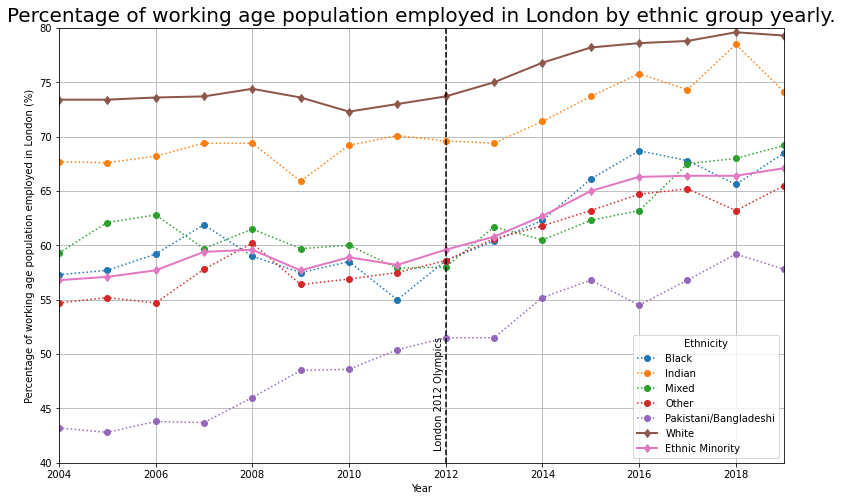

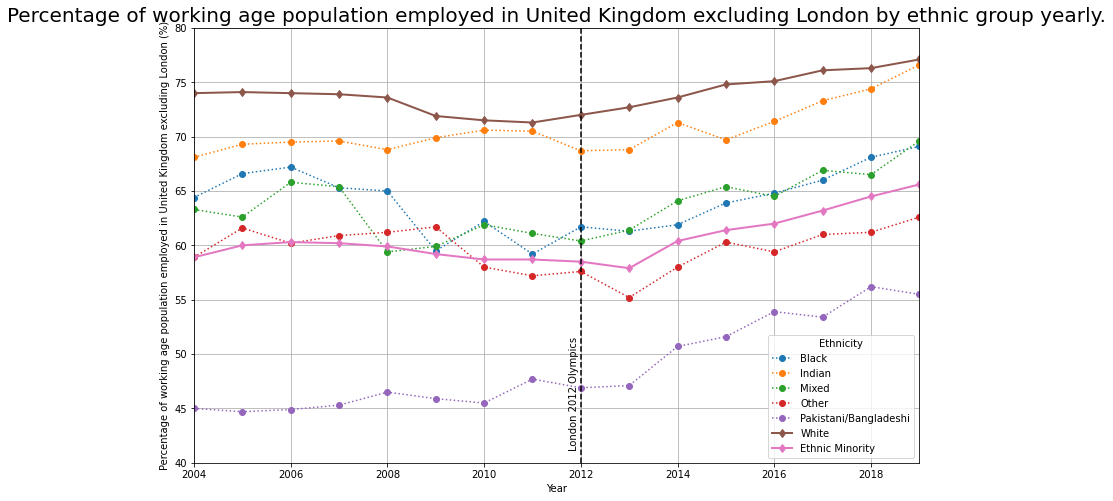

In [27]:
plot_ethnic_percentages_in(london)
plot_ethnic_percentages_in(uk_without_london)

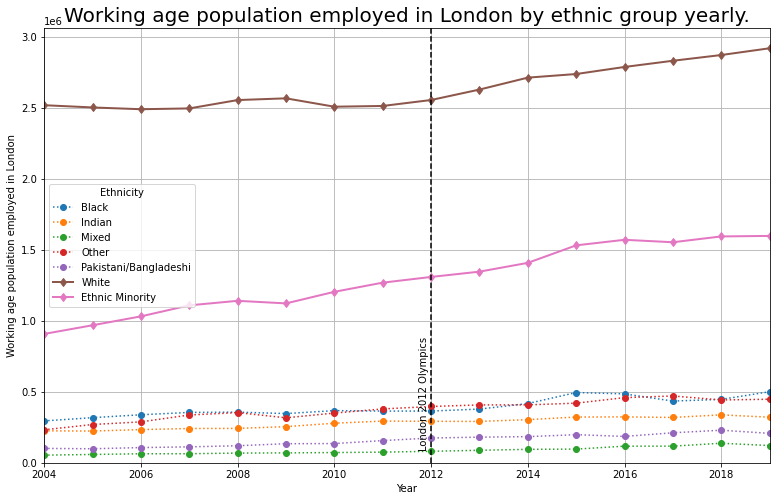

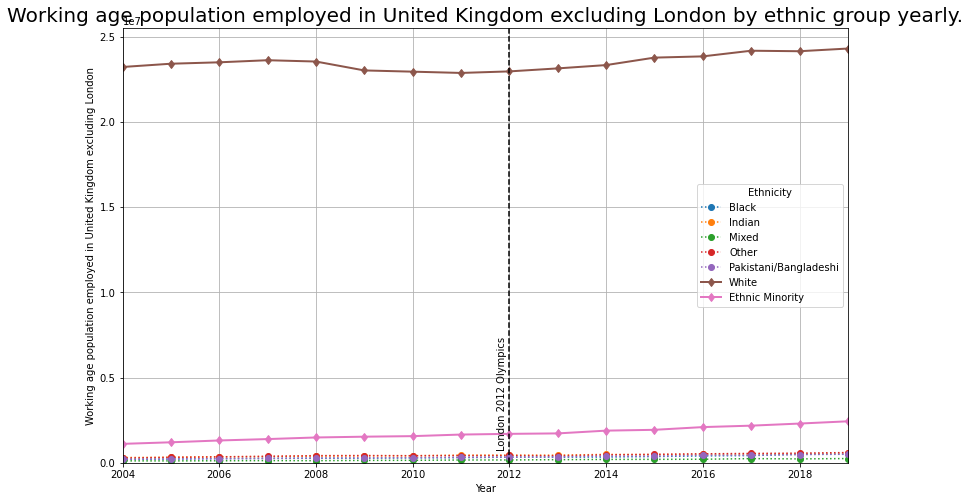

In [28]:
plot_ethnic_population_in(london)
plot_ethnic_population_in(uk_without_london)

### Comparison of employment rate by ethnicity in the Olympic boroughs, the rest of London, and the rest of the UK.

I have split the the Olympic boroughs, the London boroughs excluding the Olympic Boroughs and the UK excluding London as mutually exclusive sets of data. (Note: I use `uk_without_london` from the previous section here.)

In [29]:
data_summary(df)

Column summary:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5457 entries, 0 to 5711
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5457 non-null   int64  
 1   area_code     5457 non-null   object 
 2   area          5457 non-null   object 
 3   ethnic_group  5457 non-null   object 
 4   number        5457 non-null   int64  
 5   denominator   5457 non-null   int64  
 6   percent       5457 non-null   float64
 7   confidence    5457 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 383.7+ KB
None
Count of missing values per columns:
year            0
area_code       0
area            0
ethnic_group    0
number          0
denominator     0
percent         0
confidence      0
dtype: int64


year  area_code                  area  ... denominator  percent  confidence
0  2004  E09000001        City of London  ...        4800     89.4        11.0
1  2004  E09000002  Barking and Dagenham  ...       76900     61.7         7.5
2  2004  E09000003                Barnet  ...      142500     74.1         6.9
3  2004  E09000004                Bexley  ...      122200     76.0         6.3
4  2004  E09000005                 Brent  ...       88300     70.6         8.1

[5 rows x 8 columns]

In [30]:
# Going to remake tne data quickly since the rows aren't aligned correctly for me to manipulate using arithmetic.
data = employment_rate_ethnic_borough.copy()
data["number"] = data["number"].str.replace('\,', '').replace('#', np.nan).fillna('-1').astype(int).replace(-1, np.nan)
data["denominator"] = data["denominator"].str.replace('\,', '').replace('#', np.nan).fillna('-1').astype(int).replace(-1, np.nan)
data.fillna({"confidence": data["confidence"].median()}, inplace=True)
data_summary(data)

Column summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5712 entries, 0 to 5711
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5712 non-null   int64  
 1   area_code     5712 non-null   object 
 2   area          5712 non-null   object 
 3   ethnic_group  5712 non-null   object 
 4   number        5457 non-null   float64
 5   denominator   5555 non-null   float64
 6   percent       5470 non-null   float64
 7   confidence    5712 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 357.1+ KB
None
Count of missing values per columns:
year              0
area_code         0
area              0
ethnic_group      0
number          255
denominator     157
percent         242
confidence        0
dtype: int64


year  area_code                  area  ... denominator  percent  confidence
0  2004  E09000001        City of London  ...      4800.0     89.4        11.0
1  2004  E09000002  Barking and Dagenham  ...     76900.0     61.7         7.5
2  2004  E09000003                Barnet  ...    142500.0     74.1         6.9
3  2004  E09000004                Bexley  ...    122200.0     76.0         6.3
4  2004  E09000005                 Brent  ...     88300.0     70.6         8.1

[5 rows x 8 columns]

In [31]:
olympic_boroughs_df = data[data["area"] == olympic_boroughs[0]].reset_index(drop=True)

# Ensure data set is ordered by `year`, `area` and `ethnic_group` (just in case).
olympic_boroughs_df.sort_values(by=["year", "area", "ethnic_group"], ascending=[True, True, True])
for area in olympic_boroughs[1:]:
  borough_df = data[data["area"] == area].reset_index(drop=True)
  borough_df.sort_values(by=["year", "area", "ethnic_group"], ascending=[True, True, True])
  olympic_boroughs_df["number"] += borough_df["number"]
  olympic_boroughs_df["denominator"] += borough_df["denominator"]
  olympic_boroughs_df["confidence"] = pd.DataFrame([olympic_boroughs_df["confidence"],
                                                    borough_df["confidence"]]).min()

olympic_boroughs_df["area"] = "Hosting Olympic Boroughs"

# Recalculate percentages.
olympic_boroughs_df["percent"] = 100 * round(olympic_boroughs_df["number"] / olympic_boroughs_df["denominator"], 3)

# NOW remove entries that have NaNs.
olympic_boroughs_df.dropna(axis=0, inplace=True)
olympic_boroughs_df["number"] = olympic_boroughs_df["number"].astype(int)
olympic_boroughs_df["denominator"] = olympic_boroughs_df["denominator"].astype(int)

data_summary(olympic_boroughs_df)

Column summary:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 111
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          98 non-null     int64  
 1   area_code     98 non-null     object 
 2   area          98 non-null     object 
 3   ethnic_group  98 non-null     object 
 4   number        98 non-null     int64  
 5   denominator   98 non-null     int64  
 6   percent       98 non-null     float64
 7   confidence    98 non-null     float64
dtypes: float64(2), int64(3), object(3)
memory usage: 6.9+ KB
None
Count of missing values per columns:
year            0
area_code       0
area            0
ethnic_group    0
number          0
denominator     0
percent         0
confidence      0
dtype: int64


year  area_code                      area  ... denominator  percent  confidence
0  2004  E09000002  Hosting Olympic Boroughs  ...      487300     66.6         6.4
1  2004  E09000002  Hosting Olympic Boroughs  ...      383900     49.5         7.7
2  2004  E09000002  Hosting Olympic Boroughs  ...       14800     62.2        11.0
3  2004  E09000002  Hosting Olympic Boroughs  ...       48500     55.5        11.0
4  2004  E09000002  Hosting Olympic Boroughs  ...      117000     39.3         9.8

[5 rows x 8 columns]

In [32]:
london_without_olympic_boroughs_df = data[data["area"] == "London"].reset_index(drop=True)

# Ensure data set is ordered by `year`, `area` and `ethnic_group` (just in case).
london_without_olympic_boroughs_df.sort_values(by=["year", "area", "ethnic_group"], ascending=[True, True, True])

for area in olympic_boroughs:
  borough_df = data[data["area"] == area].reset_index(drop=True)
  borough_df.sort_values(by=["year", "area", "ethnic_group"], ascending=[True, True, True])
  london_without_olympic_boroughs_df["number"] -= borough_df["number"]
  london_without_olympic_boroughs_df["denominator"] -= borough_df["denominator"]
  london_without_olympic_boroughs_df["confidence"] = pd.DataFrame([london_without_olympic_boroughs_df["confidence"],
                                                                   borough_df["confidence"]]).min()

london_without_olympic_boroughs_df["area"] = "the rest of London"

# Recalculate percentages.
london_without_olympic_boroughs_df["percent"] = 100 * round(london_without_olympic_boroughs_df["number"] / london_without_olympic_boroughs_df["denominator"], 3)

# NOW remove entries that have NaNs.
london_without_olympic_boroughs_df.dropna(axis=0, inplace=True)
london_without_olympic_boroughs_df["number"] = london_without_olympic_boroughs_df["number"].astype(int)
london_without_olympic_boroughs_df["denominator"] = london_without_olympic_boroughs_df["denominator"].astype(int)

data_summary(london_without_olympic_boroughs_df)

Column summary:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 111
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          98 non-null     int64  
 1   area_code     98 non-null     object 
 2   area          98 non-null     object 
 3   ethnic_group  98 non-null     object 
 4   number        98 non-null     int64  
 5   denominator   98 non-null     int64  
 6   percent       98 non-null     float64
 7   confidence    98 non-null     float64
dtypes: float64(2), int64(3), object(3)
memory usage: 6.9+ KB
None
Count of missing values per columns:
year            0
area_code       0
area            0
ethnic_group    0
number          0
denominator     0
percent         0
confidence      0
dtype: int64


year  area_code                area  ... denominator  percent  confidence
0  2004  E12000007  the rest of London  ...     2942700     74.5         1.2
1  2004  E12000007  the rest of London  ...     1214100     59.1         2.0
2  2004  E12000007  the rest of London  ...       76000     58.8         8.3
3  2004  E12000007  the rest of London  ...      284100     69.8         4.2
4  2004  E12000007  the rest of London  ...      117600     47.0         5.0

[5 rows x 8 columns]

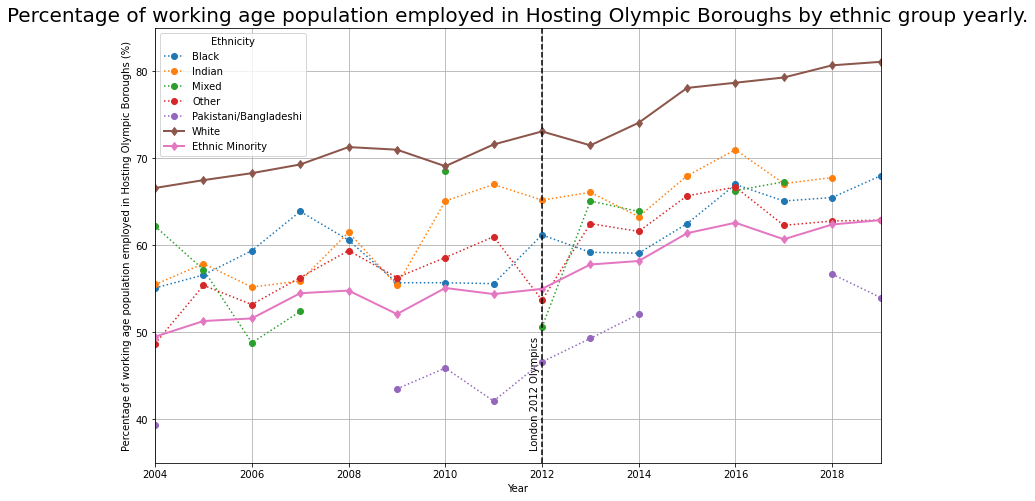

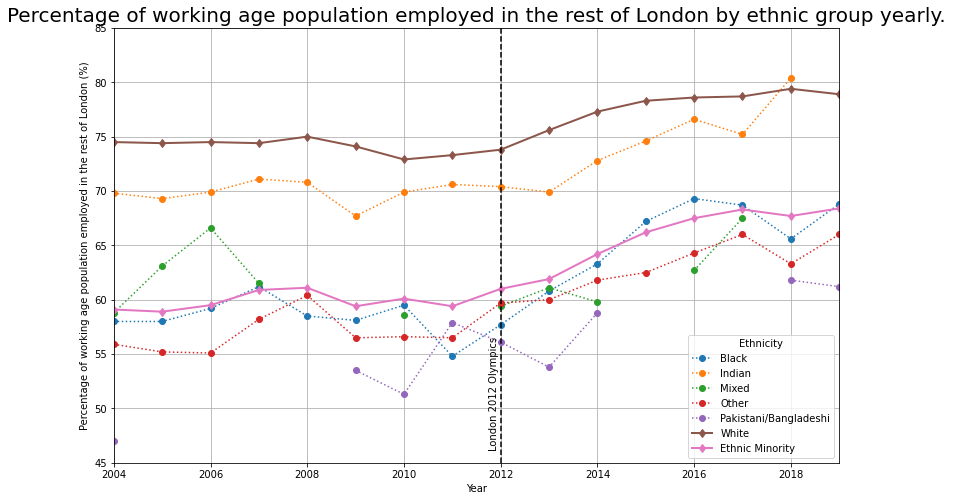

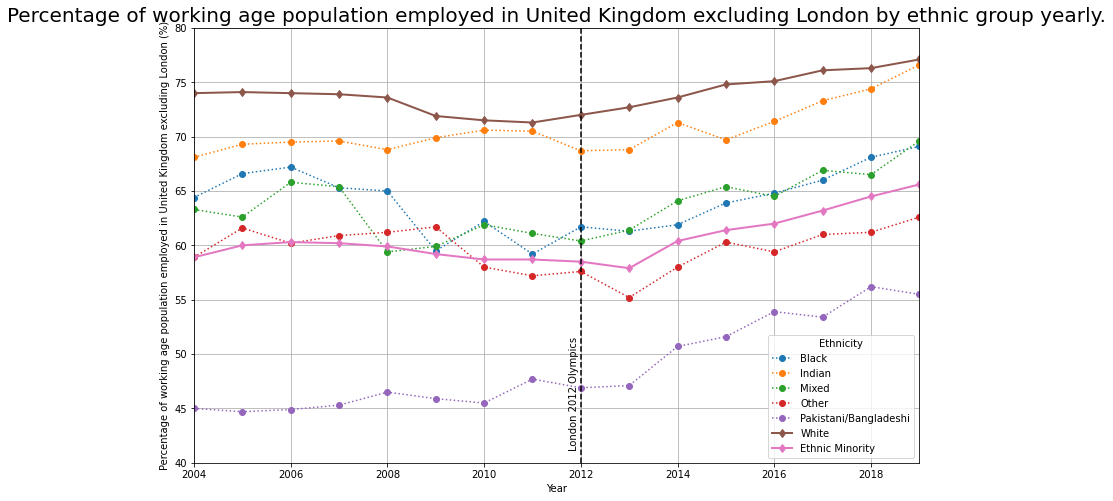

In [33]:
plot_ethnic_percentages_in(olympic_boroughs_df)
plot_ethnic_percentages_in(london_without_olympic_boroughs_df)
plot_ethnic_percentages_in(uk_without_london)

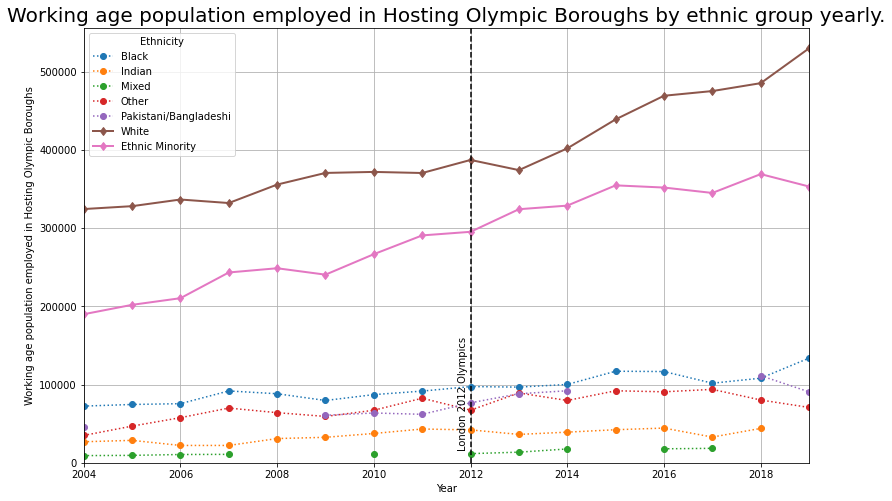

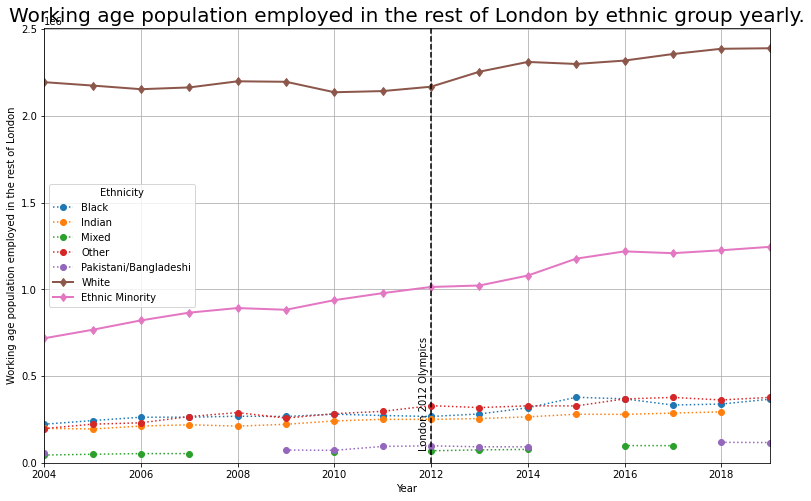

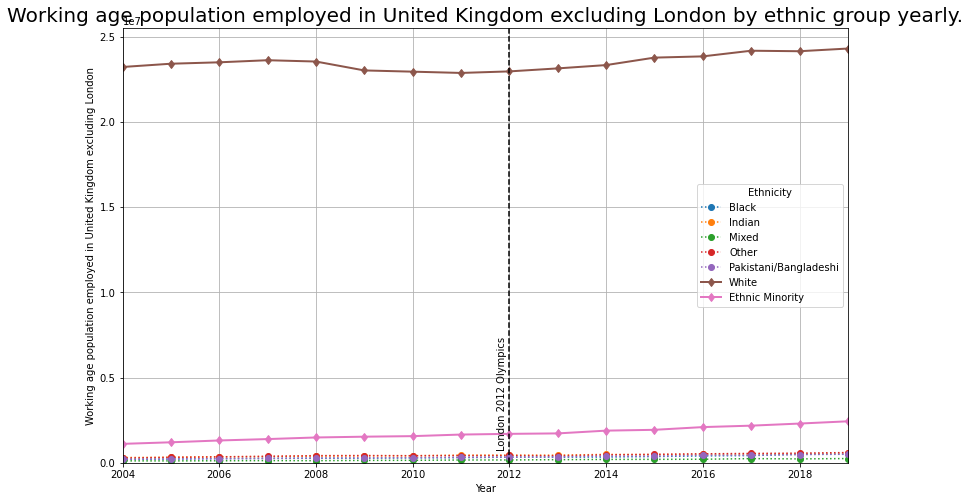

In [34]:
plot_ethnic_population_in(olympic_boroughs_df)
plot_ethnic_population_in(london_without_olympic_boroughs_df)
plot_ethnic_population_in(uk_without_london)

### Using Geopandas to model the employment rate of various ethnicities across London and the UK between 2004 - 2019.

## Hypothesis testing.

In [35]:
minority = london[london["ethnic_group"] == "Minority"]
minority

year  area_code    area  ... denominator  percent  confidence
1    2004  E12000007  London  ...     1598000     56.8         2.0
8    2005  E12000007  London  ...     1695500     57.1         2.0
15   2006  E12000007  London  ...     1786600     57.7         1.9
22   2007  E12000007  London  ...     1867400     59.4         1.9
29   2008  E12000007  London  ...     1912900     59.6         1.9
36   2009  E12000007  London  ...     1945100     57.7         2.0
43   2010  E12000007  London  ...     2044600     58.9         1.9
50   2011  E12000007  London  ...     2181100     58.2         1.8
57   2012  E12000007  London  ...     2197700     59.6         1.8
64   2013  E12000007  London  ...     2212400     60.8         1.8
71   2014  E12000007  London  ...     2246100     62.7         1.8
78   2015  E12000007  London  ...     2354600     65.0         1.8
85   2016  E12000007  London  ...     2367500     66.3         1.8
92   2017  E12000007  London  ...     2337900     66.4         1.9
99   2018  E12000007  London  ...     2401900     66.4         2.0
106  2019  E12000007  London  ...     2380600     67.1         2.1

[16 rows x 8 columns]

In [45]:
# Mean population from 2004 to 2011
before2012 = minority[minority["year"] <= 2011]["number"]
after2012 = minority[minority["year"] >= 2012]["number"]

sample_population_mean_before = before2012.mean()
sample_population_mean_after = after2012.mean()

n = len(before2012) / 1.0
sample_variance_before = float(before2012.var() * n) / n - 1

m = len(after2012) / 1.0
sample_variance_after = float(after2012.var() * m) / m - 1

print(f"Sample population mean before the London 2012 Olympics: {sample_population_mean_before}")
print(f"Sample population mean after the London 2012 Olympics: {sample_population_mean_after}")
print(f"Sample variance before the London 2012 Olympics: {sample_variance_before}")
print(f"Sample variance after the London 2012 Olympics: {sample_variance_after}")
print(f"Sample standard deviation before the London 2012 Olympics: {sample_variance_before ** 0.5}")
print(f"Sample standard deviation after the London 2012 Olympics: {sample_variance_after ** 0.5}")

bias_corrected_sample_pooled_variance = ((n - 1) * sample_variance_before / (n + m - 2)) + ((m - 1) * sample_variance_after / (n + m - 2))
print(f"Bias corrected sample pooled variance: {bias_corrected_sample_pooled_variance}")

Sample population mean before the London 2012 Olympics: 1094012.5
Sample population mean after the London 2012 Olympics: 1488712.5
Sample variance before the London 2012 Olympics: 14319044106.142857
Sample variance after the London 2012 Olympics: 13553304106.142857
Sample standard deviation before the London 2012 Olympics: 119662.20834558777
Sample standard deviation after the London 2012 Olympics: 116418.65875426866
Bias corrected sample pooled variance: 13936174106.142857


In [46]:
# T distribution test statistic comparing population means
t = (sample_population_mean_before - sample_population_mean_after) / ((bias_corrected_sample_pooled_variance ** 0.5) * (((1/n)+(1/m)) ** 0.5))
t

-6.686907880637657